# A/B Testing

## Task statement

In this project I've received an analytical task (A/B test recieved from an international online store) that had been left in the middle by my predecessor who failed to complete it. (Only the technical specifications and the test results are available). My role was making sense of it and bringing it to completion.

The work done here is: 
   * Compare test description with the actual data and check whether the test was carried out correctly (which one of the two tests).
   * Analyze the results of the trustworthy test chosen and draw conclusions.

### Technical description

- Test name: `recommender_system_test`
- Groups: А (control), B (new payment funnel)
- Launch date: 2020-12-07
- The date when they stopped taking up new users: 2020-12-21
- End date: 2021-01-01
- Audience: 15% of the new users from the EU region
- Purpose of the test: testing changes related to the introduction of an improved recommendation system
- Expected result: within 14 days of signing up, users will show better conversion into product page views (the `product_page` event), product card views (`product_card`) and purchases (`purchase`). At each of the stage of the funnel `product_page → product_card → purchase`, there will be at least a 10% increase.
- Expected number of test participants: 6000

Download the test data, see whether it was carried out correctly, and analyze the results. 

### Data

[final_ab_events_us.csv.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/46e2d646-6645-4c28-ba56-2ebe2cf9b788/final_ab_events_us.csv.csv)

[final_ab_new_users_upd.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/4117a59e-b427-42bd-b9e4-212abf5c809f/final_ab_new_users_upd.csv)

[final_ab_participants_upd.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/a946bafa-49e4-4a5e-9ead-c5b39129a790/final_ab_participants_upd.csv)

[ab_project_marketing_events.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/bd1136fb-e2ff-4444-8693-d85192fe4d23/ab_project_marketing_events.csv)

- `ab_project_marketing_events_us.csv` — the calendar of marketing events for 2020
- `final_ab_new_users_upd.csv` — all users who signed up in the online store from December 7 to 21, 2020
- `final_ab_events_upd.csv` — all events of the new users within the period from December 7, 2020 to January 1, 2021
- `final_ab_participants_upd.csv` — table containing test participants

Structure of `ab_project_marketing_events_us.csv`:

- `name` — the name of the marketing event
- `regions` — regions where the ad campaign will be held
- `start_dt` — campaign start date
- `finish_dt` — campaign end date

Structure of `final_ab_new_users_upd.csv`:

- `user_id`
- `first_date` — sign-up date
- `region`
- `device` — device used to sign up

Structure of `final_ab_events_upd.csv`:

- `user_id`
- `event_dt` — event date and time
- `event_name` — event type name
- `details` — additional data on the event (for instance, the order total in USD for `purchase` events)

Structure of `final_ab_participants_upd.csv`:

- `user_id`
- `ab_test` — test name
- `group` — the test group the user belonged to


#  Project Theme\Subject: A/B Testing:


Project description:
You've received an analytical task from an international online store. Your predecessor failed to complete it: they launched an A/B test and then quit (to start a watermelon farm in Brazil). They left only the technical specifications and the test results.

# Table of Contents:

<div style="height:10px;"></div>

1. [Download and Describe goals:](#-data)
   * [Download the data and study the general information (using info(), describe..)](#-info)
   * [Describe the goals of the research](#-goals)
   
  
<div style="height:5px;"></div>

2. [Explore the data:](#-explore)
   * [Does it need converting types?](#-types)
   * [Are there any missing or duplicate values? If so, what's their nature?](#-missing)
   
   
<div style="height:5px;"></div>

3. [Carry out exploratory data analysis:](#-eda)
   * [Study conversion at different funnel stages](#-conversion)
   * [Is the number of events per user distributed equally in the samples?](#-samples1)
   * [Are there users who enter both samples?](#-samples2)
   * [How is the number of events distributed by days?](#-events)
   * [Think of the possible details in the data that you have to take into account before starting the A/B test?](#-details)


<div style="height:5px;"></div> 

4. [Evaluate the A/B test results:](#-ab)
   * [What can you tell about the A/B test results?](#-results)
   * [Use the z-criterion to check the statistical difference between the proportions](#-z)
 
   
<div style="height:10px;"></div>


5. [Describe the conclusions on the EDA stage, as well as on the evaluation of the A/B test results:](#-conclusions)
 
<div style="height:10px;"></div>

In [1]:
!pip install sidetable
!pip install matplotlib -U
!pip install seaborn -U
!pip install squarify
!pip install plotly -U
!pip install chart-studio

In [2]:
import sidetable as stb
import scipy.stats as stats

import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py#
import plotly.express as px

from scipy import stats as st
import scipy.stats as stats

import sidetable as stb
import sys
import numpy as np
import math as mth
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py#
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [297]:
# Function aim to look for missing values and other possible errors that might be risking the credibility of analysis ahead:
def preprocess_df(dataframe: pd.core.frame.DataFrame, title: str):
    print(f'df: {title}')
    # look at a random sample of the data and study the information given:
    display(dataframe.sample(10))
    print()
    dataframe.info(memory_usage='deep')
    print()
    display(dataframe.describe().T)# include ='all'
    display(dataframe.describe(include ='object').T)
    #display(dataframe.describe(include ='all').T)
    print()
    # Using sidetable method to look at the missing values per column, how many there are and their share (presentage).
    display(dataframe.stb.missing(style = True))
    print()
    print(f'There are {dataframe.duplicated().sum()} duplicated rows')
    print('\n'*2)
    for colname in dataframe.columns:
        print(f'column: {colname.upper()}')
        if (colname not in ['user_id', 'event_dt','event_time','event_date']):
            print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
            display(dataframe.stb.freq([colname], style = True, cum_cols = False))
        #print(f'The frequencies of unique values of column {colname.upper()} in descending order are:')
        #display(dataframe.stb.freq([colname], style = True, cum_cols = False))
        print(f'The unique values of column {colname.upper()} are:')
        display(dataframe[colname].unique())
        print(f'The number of NULL values in {colname} are:')
        display(dataframe[colname].isnull().sum())
        #print('share of missing values regarding their column' in order to figure out how significant their absence is for their category or column 
        print(f'Null values ratio: {round(dataframe[colname].isnull().sum() * 100 / len(dataframe[colname]),3)} %')
        if dataframe[colname].isnull().sum() > 0 :
            print(f'The rows with the missing values for {colname} column are the following:')
            display(dataframe[dataframe[colname].isnull()])
        display(dataframe[colname].describe(include ='all').to_frame().T)
        print('\n'*3)

        

# Find and eliminate errors in the data: check for errors in dates range. make sure events are in period:
def check_date_range(row,colname):
    # period = 14 days. s_reg: 7-12-2020 , e_reg: 21-12-2020, end_test: 1-1-2021
    start_range_date = pd.to_datetime('2020-12-07 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    #end_range_date =pd.to_datetime('2020-12-21 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    end_range_date =pd.to_datetime('2021-01-01 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    event_date = row[colname] 
 
    if event_date < start_range_date or event_date > end_range_date: # check that the time ranges for all data correspond with the project description
        return False
    else:
        return True


   
#not needed
# Find and eliminate errors in the data: check for errors in registration dates. make sure registration accurs in period: 7-12-2020 up to: 21-12-2020
def check_reg_date_range(row,colname):
    # period = 14 days. s_reg: 7-12-2020 , e_reg: 21-12-2020, end_test: 1-1-2021
    start_reg_date = pd.to_datetime('2020-12-07 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    end_reg_date =pd.to_datetime('2020-12-21 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    event_date = row[colname] #.astype('datetime64[M]')
 
    if event_date < start_reg_date or event_date > end_reg_date: # check that the time ranges for all data correspond with the project description
        return False
    else:
        return True    

def fillter_users_by_region(row):
    # the user who participate in test 
    user_id = row['user_id'] 
    #check if user_id is in users and return its region
    if (user_id in ab_new_users_df['user_id'].values):
        reg = ab_new_users_df.loc[ (ab_new_users_df['user_id']==user_id) ,'region']  
        return reg.values[0]
    
def fillter_users_by_events(row):
    # the user who participate in test 
    user_id = row['user_id'] 
    #check if user_id is in events df and return its event_name:
    if (user_id in ab_events_df['user_id'].values):
        event = ab_events_df.loc[ (ab_events_df['user_id']==user_id) ,'event_name'] 
        #if reg.values=='EU': 
        return event.values[0]
    

    
# ab_new_users_df
#sign_up_date	in_range_reg_dt   
def fillter_users_by_sign_up_date(row):
    # the user who participate in test 
    user_id = row['user_id']
    start_range_date = pd.to_datetime('2020-12-07 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    end_range_date =pd.to_datetime('2020-12-21 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    
    #check if user_id is in events df and return its event_name:
    if (user_id in ab_new_users_df['user_id'].values):
        sign_date = ab_new_users_df.loc[ (ab_new_users_df['user_id']==user_id) ,'sign_up_date']
        if sign_date.values[0] >= start_range_date or sign_date.values[0] <= end_range_date:
            return sign_date.values[0]

def fillter_users_by_event_date(row):
    # the user who participate in test 
    user_id = row['user_id']
    start_range_date = pd.to_datetime('2020-12-07',format ='%Y-%m-%d')
    end_range_date =pd.to_datetime('2021-01-01',format ='%Y-%m-%d')
    
    #check if user_id is in events df and return its event_name:
    if (user_id in ab_events_df['user_id'].values):
        evet_date = ab_events_df.loc[ (ab_events_df['user_id']==user_id) ,'event_date']
        if evet_date.values[0] >= start_range_date or evet_date.values[0] < end_range_date:
            return evet_date.values[0]

 

In [4]:
# read the ab_project_marketing_events.csv file (the calendar of marketing events for 2020) at the top of the page
try:
    marketing_events_df = pd.read_csv('ab_project_marketing_events.csv',parse_dates=['start_dt','finish_dt']).copy() # ,dtype={ 'CustomerID': 'int'}
except:
    marketing_events_df = pd.read_csv('/datasets/ab_project_marketing_events.csv' ,parse_dates=['start_dt','finish_dt']).copy() #


preprocess_df(marketing_events_df, 'Marketing Events')

# Check_date_range for the campaigns:
marketing_events_df['in_range_start_dt'] = marketing_events_df.apply(check_date_range,axis=1,args=['start_dt'])  
 

display(marketing_events_df)

df: Marketing Events


,name,regions,start_dt,finish_dt
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.4 KB



,count,unique,top,freq,first,last
name,14,14,Christmas&New Year Promo,1,NaT,NaT
regions,14,6,APAC,4,NaT,NaT
start_dt,14,14,2020-12-25 00:00:00,1,2020-01-25,2020-12-30
finish_dt,14,14,2021-01-03 00:00:00,1,2020-02-07,2021-01-07


,count,unique,top,freq
name,14,14,Christmas&New Year Promo,1
regions,14,6,APAC,4


,missing,total,percent
name,0,14,0.00%
regions,0,14,0.00%
start_dt,0,14,0.00%
finish_dt,0,14,0.00%



There are 0 duplicated rows



column: NAME
The frequencies of unique values of column NAME in descending order are:


,name,count,percent
0,Victory Day CIS (May 9th) Event,1,7.14%
1,St. Valentine's Day Giveaway,1,7.14%
2,St. Patric's Day Promo,1,7.14%
3,Single's Day Gift Promo,1,7.14%
4,Labor day (May 1st) Ads Campaign,1,7.14%
5,International Women's Day Promo,1,7.14%
6,Easter Promo,1,7.14%
7,Dragon Boat Festival Giveaway,1,7.14%
8,Christmas&New Year Promo,1,7.14%
9,Chinese New Year Promo,1,7.14%


The unique values of column NAME are:


array(['Christmas&New Year Promo', "St. Valentine's Day Giveaway",
       "St. Patric's Day Promo", 'Easter Promo', '4th of July Promo',
       'Black Friday Ads Campaign', 'Chinese New Year Promo',
       'Labor day (May 1st) Ads Campaign',
       "International Women's Day Promo",
       'Victory Day CIS (May 9th) Event', 'CIS New Year Gift Lottery',
       'Dragon Boat Festival Giveaway', "Single's Day Gift Promo",
       'Chinese Moon Festival'], dtype=object)

The number of NULL values in name are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
name,14,14,Christmas&New Year Promo,1






column: REGIONS
The frequencies of unique values of column REGIONS in descending order are:


,regions,count,percent
0,APAC,4,28.57%
1,"EU, CIS, APAC, N.America",3,21.43%
2,"EU, N.America",2,14.29%
3,"EU, CIS, APAC",2,14.29%
4,CIS,2,14.29%
5,N.America,1,7.14%


The unique values of column REGIONS are:


array(['EU, N.America', 'EU, CIS, APAC, N.America', 'N.America', 'APAC',
       'EU, CIS, APAC', 'CIS'], dtype=object)

The number of NULL values in regions are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
regions,14,6,APAC,4






column: START_DT
The frequencies of unique values of column START_DT in descending order are:


,start_dt,count,percent
0,2020-12-30 00:00:00,1,7.14%
1,2020-12-25 00:00:00,1,7.14%
2,2020-11-26 00:00:00,1,7.14%
3,2020-11-11 00:00:00,1,7.14%
4,2020-10-01 00:00:00,1,7.14%
5,2020-07-04 00:00:00,1,7.14%
6,2020-06-25 00:00:00,1,7.14%
7,2020-05-09 00:00:00,1,7.14%
8,2020-05-01 00:00:00,1,7.14%
9,2020-04-12 00:00:00,1,7.14%


The unique values of column START_DT are:


array(['2020-12-25T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-03-17T00:00:00.000000000', '2020-04-12T00:00:00.000000000',
       '2020-07-04T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-05-09T00:00:00.000000000',
       '2020-12-30T00:00:00.000000000', '2020-06-25T00:00:00.000000000',
       '2020-11-11T00:00:00.000000000', '2020-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

The number of NULL values in start_dt are:


0

Null values ratio: 0.0 %


,count,unique,top,freq,first,last
start_dt,14,14,2020-12-25,1,2020-01-25,2020-12-30






column: FINISH_DT
The frequencies of unique values of column FINISH_DT in descending order are:


,finish_dt,count,percent
0,2021-01-07 00:00:00,1,7.14%
1,2021-01-03 00:00:00,1,7.14%
2,2020-12-01 00:00:00,1,7.14%
3,2020-11-12 00:00:00,1,7.14%
4,2020-10-07 00:00:00,1,7.14%
5,2020-07-11 00:00:00,1,7.14%
6,2020-07-01 00:00:00,1,7.14%
7,2020-05-11 00:00:00,1,7.14%
8,2020-05-03 00:00:00,1,7.14%
9,2020-04-19 00:00:00,1,7.14%


The unique values of column FINISH_DT are:


array(['2021-01-03T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-04-19T00:00:00.000000000',
       '2020-07-11T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2020-02-07T00:00:00.000000000', '2020-05-03T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-11-12T00:00:00.000000000', '2020-10-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

The number of NULL values in finish_dt are:


0

Null values ratio: 0.0 %


,count,unique,top,freq,first,last
finish_dt,14,14,2021-01-03,1,2020-02-07,2021-01-07


,name,regions,start_dt,finish_dt,in_range_start_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,True
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16,False
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19,False
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19,False
4,4th of July Promo,N.America,2020-07-04,2020-07-11,False
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01,False
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07,False
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03,False
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10,False
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11,False


Conclusion:

From the info() method it's turned out that  there are only 14 rows and 4 columns. There are no missing values.                  
Data Types:
The name, regions, start_dt and finish_dt are all of object dtype. 

The marketing_events_df contains information about the calendar of marketing events for 2020. 

The columns contains the following information:
   * name — the name of the marketing event
   * regions — regions where the ad campaign will be held
   * start_dt — campaign start date
   * finish_dt — campaign end date
   
After studying marketing events in order to understand what was going on with the business during 2020. It turned out that only two of the campaigns ('Christmas&New Year Promo' and 'CIS New Year Gift Lottery') are relevant to the time period we are interested in (and only 'Christmas&New Year Promo' is relevant to the region we are intrested in). The campaigns are related to Christmas & New Year, in other words, the holiday seasons and if so, it is quite obvious that it could have influenced the results of the test.

Sales are far from being regular around that period, they are much higher. We probably have more sales than usual because of the the holiday and it will be very hard to distingwish the impact of the campaigns (without relevant data from previous year or something) from that of the holidays.

In [5]:
# read the final_ab_new_users_upd.csv 

try:
    ab_new_users_df = pd.read_csv('final_ab_new_users_upd.csv', dtype= {'device':'category'},parse_dates=['first_date']).copy() # ,dtype={ 'CustomerID': 'int'}
except:
    ab_new_users_df = pd.read_csv('/datasets/final_ab_new_users_upd.csv', dtype= {'device':'category'},parse_dates=['first_date']).copy() #


preprocess_df(ab_new_users_df, 'AB New Users')    

# Rename columns name:
ab_new_users_df.rename(columns = {'first_date':'sign_up_date', 'device':'sign_up_device'}, inplace = True)


df: AB New Users


,user_id,first_date,region,device
40089,7D353B88F6FC76AF,2020-12-18,APAC,Android
52496,BFE175C8F79E8816,2020-12-13,EU,PC
12966,CC1357ECD8EF2E2C,2020-12-21,EU,Mac
43174,F024A499203223A3,2020-12-18,EU,iPhone
13055,03150B879C105655,2020-12-21,EU,Mac
12685,C99F4A393066D056,2020-12-21,EU,Android
15447,EED7CA9B0B4C0900,2020-12-21,EU,iPhone
57834,FFEC5BA236E8E9FD,2020-12-20,EU,Android
21110,E7E15543CEFCAFD8,2020-12-15,EU,Android
2078,53EEBBCBE1E3B5C2,2020-12-07,EU,Android



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  category      
dtypes: category(1), datetime64[ns](1), object(2)
memory usage: 8.0 MB



,count,unique,top,freq,first,last
user_id,58703,58703,D72A72121175D8BE,1,NaT,NaT
first_date,58703,17,2020-12-21 00:00:00,6077,2020-12-07,2020-12-23
region,58703,4,EU,43396,NaT,NaT
device,58703,4,Android,26159,NaT,NaT


,count,unique,top,freq
user_id,58703,58703,D72A72121175D8BE,1
region,58703,4,EU,43396


,missing,total,percent
user_id,0,"58,703",0.00%
first_date,0,"58,703",0.00%
region,0,"58,703",0.00%
device,0,"58,703",0.00%



There are 0 duplicated rows



column: USER_ID
The unique values of column USER_ID are:


array(['D72A72121175D8BE', 'F1C668619DFE6E65', '2E1BF1D4C37EA01F', ...,
       '7ADEE837D5D8CBBD', '1C7D23927835213F', '8F04273BB2860229'],
      dtype=object)

The number of NULL values in user_id are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
user_id,58703,58703,D72A72121175D8BE,1






column: FIRST_DATE
The frequencies of unique values of column FIRST_DATE in descending order are:


,first_date,count,percent
0,2020-12-21 00:00:00,"6,077",10.35%
1,2020-12-14 00:00:00,"5,448",9.28%
2,2020-12-07 00:00:00,"5,291",9.01%
3,2020-12-13 00:00:00,"4,181",7.12%
4,2020-12-20 00:00:00,"4,140",7.05%
5,2020-12-12 00:00:00,"3,591",6.12%
6,2020-12-19 00:00:00,"3,480",5.93%
7,2020-12-18 00:00:00,"3,238",5.52%
8,2020-12-22 00:00:00,"3,083",5.25%
9,2020-12-08 00:00:00,"3,017",5.14%


The unique values of column FIRST_DATE are:


array(['2020-12-07T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-08T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-09T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2020-12-10T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-11T00:00:00.000000000',
       '2020-12-18T00:00:00.000000000', '2020-12-12T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-13T00:00:00.000000000',
       '2020-12-20T00:00:00.000000000'], dtype='datetime64[ns]')

The number of NULL values in first_date are:


0

Null values ratio: 0.0 %


,count,unique,top,freq,first,last
first_date,58703,17,2020-12-21,6077,2020-12-07,2020-12-23






column: REGION
The frequencies of unique values of column REGION in descending order are:


,region,count,percent
0,EU,"43,396",73.92%
1,N.America,"9,051",15.42%
2,CIS,"3,130",5.33%
3,APAC,"3,126",5.33%


The unique values of column REGION are:


array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

The number of NULL values in region are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
region,58703,4,EU,43396






column: DEVICE
The frequencies of unique values of column DEVICE in descending order are:


,device,count,percent
0,Android,"26,159",44.56%
1,PC,"14,845",25.29%
2,iPhone,"11,902",20.27%
3,Mac,"5,797",9.88%


The unique values of column DEVICE are:


['PC', 'Android', 'iPhone', 'Mac']
Categories (4, object): ['Android', 'Mac', 'PC', 'iPhone']

The number of NULL values in device are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
device,58703,4,Android,26159


Conclusion:

From the info() method it's turned out that  there are 58703 entries/rows and 4 columns. There are no missing values.                  
Data Types:
The user_id, first_date, regions, device are all originally of object dtype. 

The ab_new_users_df contains information about all users who signed up in the online store from December 7 to 21, 2020

The columns contains the following information:
   * user_id
   * first_date — sign-up date
   * region
   * device — device used to sign up   
   
   
From() describe method we can see that there are users who signed up after 21-12-2020 (last 'first_date' is : 2020-12-23)


The devices range is: 'PC', 'Android', 'iPhone' and 'Mac'. Most of the users signed up from Android (26,159	users ,44.56%)  while 25.29% of the users (14,845) signed up from their PCv 
another	20.27% (11,902) of them signed up from iPhone and only 9.88% (5,797) from Mac devices. 



In [6]:
display(ab_new_users_df.stb.freq(['sign_up_date'], style = True, cum_cols = False)) # 14 days: 7-21. .indices-out of rnge: 0,8,14


#check_date_reg date for user. to figure out wether they belong to our target user considering their reg date
ab_new_users_df['in_range_reg_dt'] = ab_new_users_df.apply(check_reg_date_range,axis = 1,args =['sign_up_date'])
# I didn't drop users who sign up after the 21-12-2020 since they represent only 8.96% (5.25%+3.71%) of the dates so maybe those users still belong to the test and just stayed longer
# So, later on the users in "events" table will be fillter by the ones who participants in the test. (from participants table)"signed up". 


display(any(ab_new_users_df['in_range_reg_dt']==False))
display(ab_new_users_df[ab_new_users_df['in_range_reg_dt']==False]) # 5263  rows with irrelevant users (regarding their reg date)
print(ab_new_users_df[ab_new_users_df['in_range_reg_dt']==False].count())# 5263 rows
print(ab_new_users_df[ab_new_users_df['in_range_reg_dt']==True].count())# 53440  rows in reg date

ab_new_users_in_reg_dt = ab_new_users_df[ab_new_users_df['in_range_reg_dt']]
# display(ab_new_users_in_reg_dt) # 53440 rows are users who registered in 14 days from 7-12-2021 to 21-12-2021.

# preprocess_df(ab_new_users_in_reg_dt, 'AB New Users in Expected Registration Date')
# display(ab_new_users_in_reg_dt.user_id.nunique()) # 53440  are  reg.. but not all are in test

# user_id are all unique! , reg range is set and  EU	35,018	73.94% from them 15% would be :5,252.7 we expect to participate the test

,sign_up_date,count,percent
0,2020-12-21 00:00:00,"6,077",10.35%
1,2020-12-14 00:00:00,"5,448",9.28%
2,2020-12-07 00:00:00,"5,291",9.01%
3,2020-12-13 00:00:00,"4,181",7.12%
4,2020-12-20 00:00:00,"4,140",7.05%
5,2020-12-12 00:00:00,"3,591",6.12%
6,2020-12-19 00:00:00,"3,480",5.93%
7,2020-12-18 00:00:00,"3,238",5.52%
8,2020-12-22 00:00:00,"3,083",5.25%
9,2020-12-08 00:00:00,"3,017",5.14%


True

,user_id,sign_up_date,region,sign_up_device,in_range_reg_dt
22757,5815F7ECE74D949F,2020-12-22,CIS,PC,False
22758,32EAEA5E903E3BC1,2020-12-22,N.America,Android,False
22759,9DF7A3C46487EF0B,2020-12-22,EU,Android,False
22760,ADE98C6440423287,2020-12-22,EU,iPhone,False
22761,5A5833D3AEA75255,2020-12-22,N.America,PC,False
...,...,...,...,...,...
32118,165AFCBF42C043F8,2020-12-23,EU,PC,False
32119,54E7F36C0E976E24,2020-12-23,EU,Android,False
32120,7E43EB2E03A33E78,2020-12-23,EU,PC,False
32121,B8B679DEE9F2CA06,2020-12-23,EU,PC,False


user_id            5263
sign_up_date       5263
region             5263
sign_up_device     5263
in_range_reg_dt    5263
dtype: int64
user_id            53440
sign_up_date       53440
region             53440
sign_up_device     53440
in_range_reg_dt    53440
dtype: int64


Conclusion:

user_id are all unique! , registration range is set and the users from EU are :43,396(73.9% ) from them 15% would be :6,509.4 
So 6509.4 (around 6,000) users are expected to participate the test. 

In [7]:
# read the final_ab_events_upd.csv file:
try:
    ab_events_df = pd.read_csv('final_ab_events_us.csv',parse_dates=['event_dt']).copy()
except:
    ab_events_df = pd.read_csv('/datasets/final_ab_events_us.csv',parse_dates=['event_dt']).copy()

preprocess_df(ab_events_df, 'AB Events')


df: AB Events


,user_id,event_dt,event_name,details
223079,9C991321BC9F64FC,2020-12-24 01:10:13,product_page,NaN
209684,854391BDC1E21160,2020-12-22 14:37:45,product_page,NaN
98179,C8171D8227B75FAB,2020-12-20 11:38:54,product_cart,NaN
91370,00197A9C3EBC0611,2020-12-19 19:21:58,product_cart,NaN
207878,E134863312F43E2D,2020-12-22 06:02:37,product_page,NaN
69941,C93A37ECF99BFDE0,2020-12-12 05:20:26,product_cart,NaN
135611,F7047BE6CBBD99E0,2020-12-11 10:47:31,product_page,NaN
34446,98D2DF150AC4FE0A,2020-12-20 07:19:56,purchase,4.99
11965,DA6EB5BBD34FFC82,2020-12-13 22:52:03,purchase,9.99
66942,C9926A4C98EB7A4A,2020-12-10 22:03:23,product_cart,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247564 entries, 0 to 247563
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     247564 non-null  object 
 1   event_dt    247564 non-null  object 
 2   event_name  247563 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 53.1 MB



,count,mean,std,min,25%,50%,75%,max
details,60314.0,23.881219,72.228884,4.99,4.99,4.99,9.99,499.99


,count,unique,top,freq
user_id,247564,50391,A3917F81482141F2,28
event_dt,247564,192430,2020-12-20 02:51:18,7
event_name,247563,4,product_page,120862


,missing,total,percent
details,"187,250","247,564",75.64%
event_name,1,"247,564",0.00%
user_id,0,"247,564",0.00%
event_dt,0,"247,564",0.00%



There are 0 duplicated rows



column: USER_ID
The unique values of column USER_ID are:


array(['E1BDDCE0DAFA2679', '7B6452F081F49504', '9CD9F34546DF254C', ...,
       'C1C40523FEE87B01', '34B813E67E6DB550', '51A788D87969D0E1'],
      dtype=object)

The number of NULL values in user_id are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
user_id,247564,50391,A3917F81482141F2,28






column: EVENT_DT
The unique values of column EVENT_DT are:


array(['2020-12-07 20:22:03', '2020-12-07 09:22:53',
       '2020-12-07 12:59:29', ..., '2020-12-08 20:49:32',
       '2020-12-08 12:21:45', '2020-12-08 0'], dtype=object)

The number of NULL values in event_dt are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
event_dt,247564,192430,2020-12-20 02:51:18,7






column: EVENT_NAME
The frequencies of unique values of column EVENT_NAME in descending order are:


,event_name,count,percent
0,product_page,"120,862",48.82%
1,purchase,"60,314",24.36%
2,product_cart,"60,120",24.28%
3,login,"6,267",2.53%


The unique values of column EVENT_NAME are:


array(['purchase', 'product_cart', 'product_page', 'login', nan],
      dtype=object)

The number of NULL values in event_name are:


1

Null values ratio: 0.0 %
The rows with the missing values for event_name column are the following:


,user_id,event_dt,event_name,details
247563,9711684244113801,2020-12-08 0,NaN,NaN


,count,unique,top,freq
event_name,247563,4,product_page,120862






column: DETAILS
The frequencies of unique values of column DETAILS in descending order are:


,details,count,percent
0,4.990000,"44,579",73.91%
1,9.990000,"9,158",15.18%
2,99.990000,"5,405",8.96%
3,499.990000,"1,172",1.94%


The unique values of column DETAILS are:


array([ 99.99,   9.99,   4.99, 499.99,    nan])

The number of NULL values in details are:


187250

Null values ratio: 75.637 %
The rows with the missing values for details column are the following:


,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
247559,C21237DC47AE00C5,2020-12-08 20:49:32,login,NaN
247560,51A788D87969D0E1,2020-12-08 12:21:45,login,NaN
247561,AFFBA268256F20E7,2020-12-08 14:59:08,login,NaN
247562,C277E64F43BC26C7,2020-12-08 04:27:21,login,NaN


,count,mean,std,min,25%,50%,75%,max
details,60314.0,23.881219,72.228884,4.99,4.99,4.99,9.99,499.99


Conclusion:

From the info() method it's turned out that there are 247564 entries/rows and 4 columns. 
There are 1 missing values in event_name column and 187,250 in details column.                  

Data Types:
The user_id, event_dt and event_name device are all originally of object dtype while details is originally of float dtype. 

The ab_events_df contains information about all events of the new users within the period from December 7, 2020 to January 1, 2021.

The columns contains the following information:
   * user_id
   * event_dt — event date and time
   * event_name
   * details — additional data on the event (for instance, the order total in USD for purchase events)  
 
'2020-12-08 0' !  fix - delete from 

In [8]:
display(ab_events_df.iloc[[247563]])# event dt is problematic
#preprocess_df(ab_events_df, 'AB Events')

# Change problomatic string 'event_dt' to make it possible to convert data type to datetime:
ab_events_df.loc[(ab_events_df['event_dt'] == '2020-12-08 0' ), 'event_dt'] = '2020-12-08 02:51:18'

display(ab_events_df.iloc[[247563]])
# but..there is also a missing event name so it is better be deleted from the table:

# delete a single row 
ab_events_df = ab_events_df.drop(labels=[247563])#, axis=0)

# Now, convert data type to datetime:
ab_events_df['event_dt'] = pd.to_datetime(ab_events_df['event_dt'])# ,format = '%Y-%m-%d'

preprocess_df(ab_events_df, 'AB Events')


,user_id,event_dt,event_name,details
247563,9711684244113801,2020-12-08 0,NaN,NaN


,user_id,event_dt,event_name,details
247563,9711684244113801,2020-12-08 02:51:18,NaN,NaN


df: AB Events


,user_id,event_dt,event_name,details
209992,2539089E92FEF5FF,2020-12-22 02:34:56,product_page,NaN
26745,D488136C9D1C4181,2020-12-17 00:36:31,purchase,4.99
223622,60CA3E1D4E2E4A99,2020-12-24 23:31:45,product_page,NaN
171051,69EE63A10A7065A2,2020-12-17 01:44:28,product_page,NaN
106464,5733BEC46CF437C2,2020-12-22 18:55:41,product_cart,NaN
196430,30B481D47BD0DD4B,2020-12-20 14:10:31,product_page,NaN
84889,6FF64B9CF091F861,2020-12-17 01:46:15,product_cart,NaN
144115,2B625063A0657EAF,2020-12-13 15:40:53,product_page,NaN
28172,8FBD0E0B947C028D,2020-12-18 23:00:00,purchase,4.99
115889,29C030249C563A31,2020-12-27 06:47:19,product_cart,NaN



<class 'pandas.core.frame.DataFrame'>
Int64Index: 247563 entries, 0 to 247562
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     247563 non-null  object        
 1   event_dt    247563 non-null  datetime64[ns]
 2   event_name  247563 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 38.9 MB



,count,mean,std,min,25%,50%,75%,max
details,60314.0,23.881219,72.228884,4.99,4.99,4.99,9.99,499.99


,count,unique,top,freq
user_id,247563,50391,A3917F81482141F2,28
event_name,247563,4,product_page,120862


,missing,total,percent
details,"187,249","247,563",75.64%
user_id,0,"247,563",0.00%
event_dt,0,"247,563",0.00%
event_name,0,"247,563",0.00%



There are 0 duplicated rows



column: USER_ID
The unique values of column USER_ID are:


array(['E1BDDCE0DAFA2679', '7B6452F081F49504', '9CD9F34546DF254C', ...,
       'C1C40523FEE87B01', '34B813E67E6DB550', '51A788D87969D0E1'],
      dtype=object)

The number of NULL values in user_id are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
user_id,247563,50391,A3917F81482141F2,28






column: EVENT_DT
The unique values of column EVENT_DT are:


array(['2020-12-07T20:22:03.000000000', '2020-12-07T09:22:53.000000000',
       '2020-12-07T12:59:29.000000000', ...,
       '2020-12-08T14:11:26.000000000', '2020-12-08T20:49:32.000000000',
       '2020-12-08T12:21:45.000000000'], dtype='datetime64[ns]')

The number of NULL values in event_dt are:


0

Null values ratio: 0.0 %


,count,unique,top,freq,first,last
event_dt,247563,192429,2020-12-13 06:00:54,7,2020-12-07 00:00:33,2020-12-30 23:36:33






column: EVENT_NAME
The frequencies of unique values of column EVENT_NAME in descending order are:


,event_name,count,percent
0,product_page,"120,862",48.82%
1,purchase,"60,314",24.36%
2,product_cart,"60,120",24.28%
3,login,"6,267",2.53%


The unique values of column EVENT_NAME are:


array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

The number of NULL values in event_name are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
event_name,247563,4,product_page,120862






column: DETAILS
The frequencies of unique values of column DETAILS in descending order are:


,details,count,percent
0,4.990000,"44,579",73.91%
1,9.990000,"9,158",15.18%
2,99.990000,"5,405",8.96%
3,499.990000,"1,172",1.94%


The unique values of column DETAILS are:


array([ 99.99,   9.99,   4.99, 499.99,    nan])

The number of NULL values in details are:


187249

Null values ratio: 75.637 %
The rows with the missing values for details column are the following:


,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
247558,1144F8B4FEA25F50,2020-12-08 03:14:13,login,NaN
247559,C21237DC47AE00C5,2020-12-08 20:49:32,login,NaN
247560,51A788D87969D0E1,2020-12-08 12:21:45,login,NaN
247561,AFFBA268256F20E7,2020-12-08 14:59:08,login,NaN


,count,mean,std,min,25%,50%,75%,max
details,60314.0,23.881219,72.228884,4.99,4.99,4.99,9.99,499.99


In [9]:
#ab_events_df['event_dt']=ab_events_df['event_dt'].apply(lambda x:datetime.fromtimestamp(x))
# datetime has 'fromtimestamp' function that allows transforming from timestamp to datetime 


# Create seperate columns to date and time:
ab_events_df['event_date']=pd.to_datetime(ab_events_df['event_dt']).dt.normalize()

ab_events_df.info()
display(ab_events_df.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247563 entries, 0 to 247562
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     247563 non-null  object        
 1   event_dt    247563 non-null  datetime64[ns]
 2   event_name  247563 non-null  object        
 3   details     60314 non-null   float64       
 4   event_date  247563 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 11.3+ MB


,user_id,event_dt,event_name,details,event_date
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07


In [10]:

#check_date_reg date for user. to figure out wether they belong to our target user considering their reg date
ab_events_df['in_range_dt'] = ab_events_df.apply(check_date_range,axis=1,args=['event_dt'])  
display(any(ab_events_df['in_range_dt']==False))
display(ab_events_df[ab_events_df['in_range_dt']==False]) 
print(ab_events_df[ab_events_df['in_range_dt']==False].count())# 247563 rows
print(ab_events_df[ab_events_df['in_range_dt']==True].count())# all 247563  rows in reg date

False

,user_id,event_dt,event_name,details,event_date,in_range_dt


user_id        0
event_dt       0
event_name     0
details        0
event_date     0
in_range_dt    0
dtype: int64
user_id        247563
event_dt       247563
event_name     247563
details         60314
event_date     247563
in_range_dt    247563
dtype: int64


In [11]:
# read the final_ab_participants_upd.csv file at the top of the page
try:
    ab_participants_df = pd.read_csv('final_ab_participants_upd.csv', dtype= {'group':'category'}) # ,dtype={ 'CustomerID': 'int'}dtype={'Device':'category'},parse_dates=['Start Ts','End Ts'])
except:
    ab_participants_df = pd.read_csv('/datasets/final_ab_participants_upd.csv') #


preprocess_df(ab_participants_df, 'AB Participants')   

#  maybe user_ id should be int:
#ab_participants_df['user_id'] = ab_participants_df['user_id'].astype('int')
#ab_participants_df['user_id'] = ab_participants_df['user_id'].values.astype(np.int64)

df: AB Participants


,user_id,group,ab_test
11388,21A6EE67E112BB45,B,interface_eu_test
3479,95401934D6D6D4FC,B,recommender_system_test
2288,C80F781D9C410363,A,recommender_system_test
2736,0F5BF54E01217F14,A,recommender_system_test
48,D7DB81E99D5AE29F,A,recommender_system_test
13273,6B58D8A5D64EF26A,B,interface_eu_test
3961,EEFE21306C2018FA,B,interface_eu_test
586,0AE6BB3A134DC281,B,recommender_system_test
9318,4A105D4D702706A7,A,interface_eu_test
10377,CEFB9BF1F2AF86A7,B,interface_eu_test



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  14525 non-null  object  
 1   group    14525 non-null  category
 2   ab_test  14525 non-null  object  
dtypes: category(1), object(2)
memory usage: 2.1 MB



,count,unique,top,freq
user_id,14525,13638,307C06C0E6F09B93,2
group,14525,2,A,8214
ab_test,14525,2,interface_eu_test,10850


,count,unique,top,freq
user_id,14525,13638,307C06C0E6F09B93,2
ab_test,14525,2,interface_eu_test,10850


,missing,total,percent
user_id,0,"14,525",0.00%
group,0,"14,525",0.00%
ab_test,0,"14,525",0.00%



There are 0 duplicated rows



column: USER_ID
The unique values of column USER_ID are:


array(['D1ABA3E2887B6A73', 'A7A3664BD6242119', 'DABC14FDDFADD29E', ...,
       'F501F79D332BE86C', '63FBE257B05F2245', '79F9ABFB029CF724'],
      dtype=object)

The number of NULL values in user_id are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
user_id,14525,13638,307C06C0E6F09B93,2






column: GROUP
The frequencies of unique values of column GROUP in descending order are:


,group,count,percent
0,A,"8,214",56.55%
1,B,"6,311",43.45%


The unique values of column GROUP are:


['A', 'B']
Categories (2, object): ['A', 'B']

The number of NULL values in group are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
group,14525,2,A,8214






column: AB_TEST
The frequencies of unique values of column AB_TEST in descending order are:


,ab_test,count,percent
0,interface_eu_test,"10,850",74.70%
1,recommender_system_test,"3,675",25.30%


The unique values of column AB_TEST are:


array(['recommender_system_test', 'interface_eu_test'], dtype=object)

The number of NULL values in ab_test are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
ab_test,14525,2,interface_eu_test,10850


Conclusion:

From the info() method it's turned out that  there are 14525 entries/rows and 3 columns. There are no missing values.                  
Data Types:
The user_id, group and ab_test are all originally of object dtype. 

The ab_new_users_df contains information about  table containing test participants.

The columns contains the following information:
   * user_id
   * group - the test group the user belonged to
   * ab_test - test name

In [12]:

def fillter_users_by_region(row):
    # the user who participate in test 
    user_id = row['user_id'] 
    #check if user_id is in users and return its region
    if (user_id in ab_new_users_df['user_id'].values):
        reg = ab_new_users_df.loc[ (ab_new_users_df['user_id']==user_id) ,'region'] 
        #if reg.values=='EU': 
        return reg.values[0]
    
# DD = ab_participants_recommender_test_df.copy()    


def fillter_users_by_events(row):
    # the user who participate in test 
    user_id = row['user_id'] 
    #check if user_id is in events df and return its event_name:
    if (user_id in ab_events_df['user_id'].values):
        event = ab_events_df.loc[ (ab_events_df['user_id']==user_id) ,'event_name'] 
        #if reg.values=='EU': 
        return event.values[0]
    

    
# ab_new_users_df
#sign_up_date	in_range_reg_dt   
def fillter_users_by_sign_up_date(row):
    # the user who participate in test 
    user_id = row['user_id']
    start_range_date = pd.to_datetime('2020-12-07 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    end_range_date =pd.to_datetime('2020-12-21 00:00:00',format ='%Y-%m-%d %H:%M:%S')
    
    #check if user_id is in events df and return its event_name:
    if (user_id in ab_new_users_df['user_id'].values):
        sign_date = ab_new_users_df.loc[ (ab_new_users_df['user_id']==user_id) ,'sign_up_date']
        if sign_date.values[0] >= start_range_date or sign_date.values[0] <= end_range_date:
            return sign_date.values[0]


def fillter_users_by_event_date(row):
    # the user who participate in test 
    user_id = row['user_id']
    start_range_date = pd.to_datetime('2020-12-07',format ='%Y-%m-%d')
    end_range_date =pd.to_datetime('2021-01-01',format ='%Y-%m-%d')
    
    #check if user_id is in events df and return its event_name:
    if (user_id in ab_events_df['user_id'].values):
        evet_date = ab_events_df.loc[ (ab_events_df['user_id']==user_id) ,'event_date']
        if evet_date.values[0] >= start_range_date or evet_date.values[0] < end_range_date:
            return evet_date.values[0]

 

* Make sure that you're analyzing the right test
* Use participants table to keep only participants of relevant test
* Use users table to make sure that participants were from needed region
* Filter the event  table based on participants and work with filtered data)

In [13]:
# Make sure that you're analyzing the right test:
# Use participants table to keep only participants of relevant test:

ab_participants_recommender_test_df = ab_participants_df[ab_participants_df['ab_test']=='recommender_system_test']
ab_participants_recommender_test_df.info()#3675 rows in  this test
display(ab_participants_recommender_test_df.sample(5))

preprocess_df(ab_participants_recommender_test_df, 'AB Participants for Recommender System Test')  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3674
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  3675 non-null   object  
 1   group    3675 non-null   category
 2   ab_test  3675 non-null   object  
dtypes: category(1), object(2)
memory usage: 89.8+ KB


,user_id,group,ab_test
2834,CE771EFC59ED44A5,A,recommender_system_test
1791,74079CD878C158EF,A,recommender_system_test
1689,D649423E43336656,A,recommender_system_test
132,2B8FD20CA8A2A616,A,recommender_system_test
1634,2828E6688DC580C4,A,recommender_system_test


df: AB Participants for Recommender System Test


,user_id,group,ab_test
1761,58762DB8BD8A7A05,A,recommender_system_test
3398,514E9A2436E0C45C,A,recommender_system_test
1898,9D1710D562537AA8,A,recommender_system_test
3070,8FBAEB717ABA3930,B,recommender_system_test
102,3E76EBF712971549,A,recommender_system_test
1385,50319767BCBD5646,A,recommender_system_test
1490,763DEEB7EA385F29,B,recommender_system_test
369,F19205C6AF985AC9,A,recommender_system_test
2926,4823117701C71CAA,A,recommender_system_test
402,2B780373E58B31B1,B,recommender_system_test



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3674
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  3675 non-null   object  
 1   group    3675 non-null   category
 2   ab_test  3675 non-null   object  
dtypes: category(1), object(2)
memory usage: 581.6 KB



,count,unique,top,freq
user_id,3675,3675,D1ABA3E2887B6A73,1
group,3675,2,A,2747
ab_test,3675,1,recommender_system_test,3675


,count,unique,top,freq
user_id,3675,3675,D1ABA3E2887B6A73,1
ab_test,3675,1,recommender_system_test,3675


,missing,total,percent
user_id,0,"3,675",0.00%
group,0,"3,675",0.00%
ab_test,0,"3,675",0.00%



There are 0 duplicated rows



column: USER_ID
The unique values of column USER_ID are:


array(['D1ABA3E2887B6A73', 'A7A3664BD6242119', 'DABC14FDDFADD29E', ...,
       'F2FBBA33F37DEC46', '29C92313A98B1176', '6715343AFBA285AE'],
      dtype=object)

The number of NULL values in user_id are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
user_id,3675,3675,D1ABA3E2887B6A73,1






column: GROUP
The frequencies of unique values of column GROUP in descending order are:


,group,count,percent
0,A,"2,747",74.75%
1,B,928,25.25%


The unique values of column GROUP are:


['A', 'B']
Categories (2, object): ['A', 'B']

The number of NULL values in group are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
group,3675,2,A,2747






column: AB_TEST
The frequencies of unique values of column AB_TEST in descending order are:


,ab_test,count,percent
0,recommender_system_test,"3,675",100.00%


The unique values of column AB_TEST are:


array(['recommender_system_test'], dtype=object)

The number of NULL values in ab_test are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
ab_test,3675,1,recommender_system_test,3675


In [14]:

# Use users table to make sure that participants were from needed region:

# Add column of 'region' to participants df in order to fillter those who are not from EU:
ab_participants_recommender_test_df['region']= ab_participants_recommender_test_df.apply(fillter_users_by_region, axis = 1) 
 

display(any(ab_participants_recommender_test_df['region']!='EU'))
display(ab_participants_recommender_test_df[ab_participants_recommender_test_df['region']!='EU']) # 194 rows of users from diffrent regions:N.America , APAC.. 
#ab_participants_recommender_test_df = ab_participants_recommender_test_df[ab_participants_recommender_test_df['']=='EU']
# Leave only users from 'EU' :

#ab_participants_relevant_df = ab_participants_recommender_test_df[ab_participants_recommender_test_df['region']== 'EU']
#display(ab_participants_relevant_df.sample(5))


#check_reg_date_range
# check if they resiter in period..
ab_participants_recommender_test_df['sign_up_date']= ab_participants_recommender_test_df.apply(fillter_users_by_sign_up_date, axis = 1)



ab_participants_recommender_test_df['in_range_sign_up_dt'] = ab_participants_recommender_test_df.apply(check_reg_date_range,axis=1,args=['sign_up_date'])  

ab_participants_recommender_test_df_out_of_reg_period = ab_participants_recommender_test_df[ab_participants_recommender_test_df['in_range_sign_up_dt']==False]
display(ab_participants_recommender_test_df_out_of_reg_period)
# all are in reg date !  great! 

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1593954772.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



True

,user_id,group,ab_test,region
3481,800AF45A68291849,A,recommender_system_test,N.America
3482,D2EE314AAEA02F72,A,recommender_system_test,N.America
3483,2A5675463AECCD76,A,recommender_system_test,N.America
3484,9D8E1DFF5B436455,A,recommender_system_test,N.America
3485,97845CC971F6A022,A,recommender_system_test,N.America
...,...,...,...,...
3670,053FB26D6D49EDDC,A,recommender_system_test,N.America
3671,9D263B8EF15CF188,B,recommender_system_test,N.America
3672,F2FBBA33F37DEC46,A,recommender_system_test,APAC
3673,29C92313A98B1176,B,recommender_system_test,APAC


C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1593954772.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1593954772.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,group,ab_test,region,sign_up_date,in_range_sign_up_dt


In [15]:
ab_participants_recommender_test_df_out_of_reg_period.sign_up_date.value_counts()

Series([], Name: sign_up_date, dtype: int64)

Conclusion:

'recommender_system_test' test (ab_participants_recommender_test_df)  has 3675 rows. 3 column no missing values or duplicated rows. 

From describe() it is ensured that the users are all unique (freq of 'top' user_id is 1 !)as expected.

There are two groups (A and B ). A with 2,747 users (74.75%) and B with	928	(25.25%), the split is definetly not equal. 
The particopants are not from EU (There are 194 users from other regions.) 


In [16]:
# Make sure that you're analyzing the right test:
# Use participants table to keep only participants of relevant test:

ab_participants_interface_eu_test = ab_participants_df[ab_participants_df['ab_test']=='interface_eu_test']
#ab_participants_interface_eu_test.info()#  10850 entries in this test (all users are qnique..)
#display(ab_participants_interface_eu_test.sample(5))
#part_users = ab_participants_recommender_test_df[['user_id']]
#part_users.info()


preprocess_df(ab_participants_interface_eu_test, 'AB Participants for Interface EU Test')  

df: AB Participants for Interface EU Test


,user_id,group,ab_test
13923,4077A18E75FD229F,A,interface_eu_test
4625,B603994F49C224A0,A,interface_eu_test
13183,A0A79CD1BECA342A,B,interface_eu_test
7249,F9B5CD69B9641203,B,interface_eu_test
6441,BECFF78C29C10874,B,interface_eu_test
10696,6E1A9ABB3FAFF260,B,interface_eu_test
11849,36A4FD8FDB6FE8CA,A,interface_eu_test
6827,0608609CBB599325,A,interface_eu_test
10159,F5AC8B3F6630C0CD,A,interface_eu_test
6993,90B1F7151D2338B7,A,interface_eu_test



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10850 entries, 3675 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   user_id  10850 non-null  object  
 1   group    10850 non-null  category
 2   ab_test  10850 non-null  object  
dtypes: category(1), object(2)
memory usage: 1.6 MB



,count,unique,top,freq
user_id,10850,10850,D4E530F6595A05A3,1
group,10850,2,A,5467
ab_test,10850,1,interface_eu_test,10850


,count,unique,top,freq
user_id,10850,10850,D4E530F6595A05A3,1
ab_test,10850,1,interface_eu_test,10850


,missing,total,percent
user_id,0,"10,850",0.00%
group,0,"10,850",0.00%
ab_test,0,"10,850",0.00%



There are 0 duplicated rows



column: USER_ID
The unique values of column USER_ID are:


array(['D4E530F6595A05A3', '6BCB0F33D3BAB8C2', 'FB6F6BC119E1DBD5', ...,
       'F501F79D332BE86C', '63FBE257B05F2245', '79F9ABFB029CF724'],
      dtype=object)

The number of NULL values in user_id are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
user_id,10850,10850,D4E530F6595A05A3,1






column: GROUP
The frequencies of unique values of column GROUP in descending order are:


,group,count,percent
0,A,"5,467",50.39%
1,B,"5,383",49.61%


The unique values of column GROUP are:


['A', 'B']
Categories (2, object): ['A', 'B']

The number of NULL values in group are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
group,10850,2,A,5467






column: AB_TEST
The frequencies of unique values of column AB_TEST in descending order are:


,ab_test,count,percent
0,interface_eu_test,"10,850",100.00%


The unique values of column AB_TEST are:


array(['interface_eu_test'], dtype=object)

The number of NULL values in ab_test are:


0

Null values ratio: 0.0 %


,count,unique,top,freq
ab_test,10850,1,interface_eu_test,10850


Conclusion:



In [17]:

# Use users table to make sure that participants were from needed region:

# Add column of 'region' to participants df in order to fillter those who are not from EU:
ab_participants_interface_eu_test['region']= ab_participants_interface_eu_test.apply(fillter_users_by_region, axis = 1) 
 

display(any(ab_participants_interface_eu_test['region']!='EU'))
display(ab_participants_interface_eu_test[ab_participants_interface_eu_test['region']!='EU']) #  rows of users from diffrent regions:N.America , APAC.. 


# all users in this test are from EU !!

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1239861257.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False

,user_id,group,ab_test,region


In [18]:
# Add column of 'sign_up_date' to participants df in order to fillter those who dont register in the.. 
ab_participants_interface_eu_test['sign_up_date']= ab_participants_interface_eu_test.apply(fillter_users_by_sign_up_date, axis = 1)
ab_participants_interface_eu_test


#check_reg_date_range
#fillter_users_by_sign_up_date
ab_participants_interface_eu_test['in_range_sign_up_dt'] = ab_participants_interface_eu_test.apply(check_reg_date_range,axis=1,args=['sign_up_date'])  
ab_participants_interface_eu_test


C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/263094121.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/263094121.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,group,ab_test,region,sign_up_date,in_range_sign_up_dt
3675,D4E530F6595A05A3,A,interface_eu_test,EU,2020-12-22,False
3676,6BCB0F33D3BAB8C2,A,interface_eu_test,EU,2020-12-21,True
3677,FB6F6BC119E1DBD5,B,interface_eu_test,EU,2020-12-18,True
3678,2D2E7AA539CF348F,B,interface_eu_test,EU,2020-12-22,False
3679,4BA448BCE1343C6F,A,interface_eu_test,EU,2020-12-13,True
...,...,...,...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test,EU,2020-12-15,True
14521,3DE51B726983B657,A,interface_eu_test,EU,2020-12-07,True
14522,F501F79D332BE86C,A,interface_eu_test,EU,2020-12-17,True
14523,63FBE257B05F2245,A,interface_eu_test,EU,2020-12-20,True


In [19]:
# Add column of 'sign_up_date' to participants df in order to fillter those who dont register in the.. 
ab_participants_interface_eu_test['sign_up_date']= ab_participants_interface_eu_test.apply(fillter_users_by_sign_up_date, axis = 1)
ab_participants_interface_eu_test


#check_reg_date_range
#fillter_users_by_sign_up_date
ab_participants_interface_eu_test['in_range_sign_up_dt'] = ab_participants_interface_eu_test.apply(check_reg_date_range,axis=1,args=['sign_up_date'])  
ab_participants_interface_eu_test


display(ab_participants_interface_eu_test[ab_participants_interface_eu_test['in_range_sign_up_dt']==False]) # 1002 rows


ab_participants_interface_eu_test_in_reg_period = ab_participants_interface_eu_test[ab_participants_interface_eu_test['in_range_sign_up_dt']==True]
ab_participants_interface_eu_test_out_of_reg_period  = ab_participants_interface_eu_test[ab_participants_interface_eu_test['in_range_sign_up_dt']==False]

ab_participants_interface_eu_test_out_of_reg_period.info()
#ab_participants_interface_eu_test_in_reg_period.info()
display(ab_participants_interface_eu_test_out_of_reg_period)

ab_participants_interface_eu_test_in_reg_period.info() # only  are in range. maybe range not till 20 but 21

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1961256428.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1961256428.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,group,ab_test,region,sign_up_date,in_range_sign_up_dt
3675,D4E530F6595A05A3,A,interface_eu_test,EU,2020-12-22,False
3678,2D2E7AA539CF348F,B,interface_eu_test,EU,2020-12-22,False
3689,D8A27B23556EB9E7,A,interface_eu_test,EU,2020-12-22,False
3706,FA7D7C9F31CCB179,B,interface_eu_test,EU,2020-12-22,False
3714,DA17A1786585D464,A,interface_eu_test,EU,2020-12-22,False
...,...,...,...,...,...,...
14453,C9FC3D1C6E944C69,B,interface_eu_test,EU,2020-12-22,False
14457,51D97579710AC8F7,A,interface_eu_test,EU,2020-12-23,False
14462,F32EACBE2CE5EAD1,B,interface_eu_test,EU,2020-12-22,False
14488,21E26F864516C019,B,interface_eu_test,EU,2020-12-22,False


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 3675 to 14510
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              1002 non-null   object        
 1   group                1002 non-null   category      
 2   ab_test              1002 non-null   object        
 3   region               1002 non-null   object        
 4   sign_up_date         1002 non-null   datetime64[ns]
 5   in_range_sign_up_dt  1002 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), object(3)
memory usage: 41.2+ KB


,user_id,group,ab_test,region,sign_up_date,in_range_sign_up_dt
3675,D4E530F6595A05A3,A,interface_eu_test,EU,2020-12-22,False
3678,2D2E7AA539CF348F,B,interface_eu_test,EU,2020-12-22,False
3689,D8A27B23556EB9E7,A,interface_eu_test,EU,2020-12-22,False
3706,FA7D7C9F31CCB179,B,interface_eu_test,EU,2020-12-22,False
3714,DA17A1786585D464,A,interface_eu_test,EU,2020-12-22,False
...,...,...,...,...,...,...
14453,C9FC3D1C6E944C69,B,interface_eu_test,EU,2020-12-22,False
14457,51D97579710AC8F7,A,interface_eu_test,EU,2020-12-23,False
14462,F32EACBE2CE5EAD1,B,interface_eu_test,EU,2020-12-22,False
14488,21E26F864516C019,B,interface_eu_test,EU,2020-12-22,False




<class 'pandas.core.frame.DataFrame'>
Int64Index: 9848 entries, 3676 to 14524
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              9848 non-null   object        
 1   group                9848 non-null   category      
 2   ab_test              9848 non-null   object        
 3   region               9848 non-null   object        
 4   sign_up_date         9848 non-null   datetime64[ns]
 5   in_range_sign_up_dt  9848 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), object(3)
memory usage: 404.0+ KB


In [20]:

# events - in order to see range of dates
events = ab_events_df[['event_dt']].drop_duplicates()
events['event_dt'] = pd.to_datetime(events["event_dt"]) 

# Create seperate columns to date and time:
events['event_date']=events['event_dt'].dt.date
#display(events)

#display(ab_events_df[colname].describe(include ='object').to_frame().T)
#display(events['event_dt'].unique())

display(events.stb.freq(['event_date'], style = True, cum_cols = False)) 
# all events are in expected period of time from 7-12-20 till yhe end of year. 
 

,event_date,count,percent
0,2020-12-21,"14,205",7.38%
1,2020-12-22,"12,846",6.68%
2,2020-12-20,"11,653",6.06%
3,2020-12-14,"11,549",6.00%
4,2020-12-23,"11,529",5.99%
5,2020-12-19,"10,824",5.62%
6,2020-12-15,"10,448",5.43%
7,2020-12-18,"10,218",5.31%
8,2020-12-17,"9,810",5.10%
9,2020-12-16,"9,373",4.87%


In [278]:
#  Create a list of relevant users (from participants table of the relevant chosen test) 

#  From those who are innnnnnnnnnnn reg date?

#rel_users = list(ab_participants_interface_eu_test_in_reg_period['user_id'])
rel_users = list(ab_participants_interface_eu_test['user_id']) 
    
# filter events for users who participate the test:   
print('ab_events_relevant_df:')
ab_events_relevant_df = ab_events_df[ab_events_df['user_id'].isin(rel_users)]
display(ab_events_relevant_df.info())
display(ab_events_relevant_df.sample(10))
print()

ab_events_irrelevant_df = ab_events_df[~ab_events_df['user_id'].isin(rel_users)]
print('ab_events_irrelevant_df:') # 201355 entries
#display(ab_events_df['user_id'].nunique()) # 50391 users
display(ab_events_irrelevant_df.info())
    
# now , to add the groups to event table :Let's create a dictionary with pair: user-group and then add it to events_clean:
user_group_dict = dict(zip(ab_participants_interface_eu_test.user_id , ab_participants_interface_eu_test.group))
#user_group_dict = dict(zip(ab_participants_interface_eu_test_in_reg_period.user_id , ab_participants_interface_eu_test_in_reg_period.group))
#display(user_group_dict)
 
# use the dictionary to add group to event table :

#ab_participants_interface_eu_test['user_id'] = ab_participants_interface_eu_test['group'].apply
ab_events_relevant_df['group']= ab_events_relevant_df['user_id'].map(user_group_dict)
display(ab_events_relevant_df['group'])
    
ab_events_relevant_df # 46208 rows

ab_events_relevant_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 3 to 247561
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      46208 non-null  object        
 1   event_dt     46208 non-null  datetime64[ns]
 2   event_name   46208 non-null  object        
 3   details      11644 non-null  float64       
 4   event_date   46208 non-null  datetime64[ns]
 5   in_range_dt  46208 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), object(2)
memory usage: 2.2+ MB


None

,user_id,event_dt,event_name,details,event_date,in_range_dt
198872,EE8401B631ED63CE,2020-12-21 14:05:46,product_page,NaN,2020-12-21,True
160267,476A48AA1CD1B224,2020-12-15 13:56:58,product_page,NaN,2020-12-15,True
173808,CC88634769F59F66,2020-12-17 19:32:35,product_page,NaN,2020-12-17,True
145741,D7DB0ABF44D7B28A,2020-12-13 21:44:03,product_page,NaN,2020-12-13,True
157905,F55A351425ACB3CC,2020-12-15 11:59:04,product_page,NaN,2020-12-15,True
28011,9FFEA8F955C4939C,2020-12-18 11:14:01,purchase,9.99,2020-12-18,True
93148,35A3554E0AEADD74,2020-12-19 00:57:29,product_cart,NaN,2020-12-19,True
116584,BB1B972D2F6728B5,2020-12-27 13:47:59,product_cart,NaN,2020-12-27,True
141612,0CD194D4745FA68D,2020-12-12 09:42:21,product_page,NaN,2020-12-12,True
236178,830591A5F56A9872,2020-12-28 09:05:36,product_page,NaN,2020-12-28,True



ab_events_irrelevant_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201355 entries, 0 to 247562
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      201355 non-null  object        
 1   event_dt     201355 non-null  datetime64[ns]
 2   event_name   201355 non-null  object        
 3   details      48670 non-null   float64       
 4   event_date   201355 non-null  datetime64[ns]
 5   in_range_dt  201355 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), object(2)
memory usage: 9.4+ MB


None

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/496290488.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3         B
9         A
11        A
12        B
13        A
         ..
247548    B
247552    A
247559    B
247560    A
247561    A
Name: group, Length: 46208, dtype: object

,user_id,event_dt,event_name,details,event_date,in_range_dt,group
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,True,B
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,True,A
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,True,A
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,True,B
13,0313C457F07C339E,2020-12-07 13:10:48,purchase,9.99,2020-12-07,True,A
...,...,...,...,...,...,...,...
247548,8E062FDB75AC60FC,2020-12-08 13:56:54,login,NaN,2020-12-08,True,B
247552,16DEE745B1F754A2,2020-12-08 12:52:31,login,NaN,2020-12-08,True,A
247559,C21237DC47AE00C5,2020-12-08 20:49:32,login,NaN,2020-12-08,True,B
247560,51A788D87969D0E1,2020-12-08 12:21:45,login,NaN,2020-12-08,True,A


In [22]:
#ab_events_relevant_df = ab_events_df[ab_events_df['user_id'].isin(rel_users)]
#display(ab_events_relevant_df)


#check_date_range for events. 
ab_events_relevant_df['in_range_event_dt'] = ab_events_relevant_df.apply(check_date_range,axis=1,args=['event_dt'])  

display(any(ab_events_relevant_df['in_range_event_dt']==False))
display(all(ab_events_relevant_df['in_range_event_dt']==True)) # all in range? !

display(ab_events_relevant_df[ab_events_relevant_df['in_range_event_dt']==False]) 
#ab_events_relevant_df = ab_events_relevant_df.drop()

#ab_events_relevant_df.drop(['in_range_event_dt'], axis=1, inplace=True)

ab_events_relevant_df.info()# 46208

#display(ab_events_irrelevant_df)# 201355

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/813773845.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False

True

,user_id,event_dt,event_name,details,event_date,in_range_dt,group,in_range_event_dt


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 3 to 247561
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            46208 non-null  object        
 1   event_dt           46208 non-null  datetime64[ns]
 2   event_name         46208 non-null  object        
 3   details            11644 non-null  float64       
 4   event_date         46208 non-null  datetime64[ns]
 5   in_range_dt        46208 non-null  bool          
 6   group              46208 non-null  object        
 7   in_range_event_dt  46208 non-null  bool          
dtypes: bool(2), datetime64[ns](2), float64(1), object(3)
memory usage: 2.6+ MB


In [23]:
# Now , to add the groups to event table :Let's create a dictionary with pair: user-group and then add it to events_clean:
user_sign_up_date_dict = dict(zip(ab_participants_interface_eu_test.user_id , ab_participants_interface_eu_test.sign_up_date))
#display(user_sign_up_date_dict)
 
# use the dictionary to add group to event table :

#ab_participants_interface_eu_test['user_id'] = ab_participants_interface_eu_test['group'].apply
ab_events_relevant_df['sign_up_date']= ab_events_relevant_df['user_id'].map(user_sign_up_date_dict)
display(ab_events_relevant_df.sample(10))
#ab_events_relevant_df['group']= ab_events_relevant_df['user_id'].apply(lambda x: user_group_dict.get(x) )
       
ab_events_relevant_df.info()

C:\Users\Gome\AppData\Local\Temp/ipykernel_25236/1584263658.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,event_dt,event_name,details,event_date,in_range_dt,group,in_range_event_dt,sign_up_date
194794,232B72877F00E1F2,2020-12-20 03:36:19,product_page,NaN,2020-12-20,True,B,True,2020-12-20
211108,E75809FC7CF5791F,2020-12-22 12:05:22,product_page,NaN,2020-12-22,True,A,True,2020-12-22
24481,4582F5A5EE8F50DB,2020-12-16 10:43:53,purchase,4.99,2020-12-16,True,A,True,2020-12-13
160777,154A1C670CCB534D,2020-12-15 13:35:29,product_page,NaN,2020-12-15,True,B,True,2020-12-15
205314,F51CF9E3014992E4,2020-12-21 23:55:34,product_page,NaN,2020-12-21,True,A,True,2020-12-20
73379,7935DC33DB174A8E,2020-12-13 10:46:15,product_cart,NaN,2020-12-13,True,B,True,2020-12-12
203508,39C95CB331BC8FE2,2020-12-21 09:45:11,product_page,NaN,2020-12-21,True,A,True,2020-12-18
238628,0BD6F9337991423F,2020-12-29 11:24:00,product_page,NaN,2020-12-29,True,B,True,2020-12-14
2132,8FBD08FF36DC6FB4,2020-12-08 15:42:35,purchase,4.99,2020-12-08,True,A,True,2020-12-07
96680,4B5D6C71C68C4471,2020-12-20 07:10:45,product_cart,NaN,2020-12-20,True,A,True,2020-12-19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 3 to 247561
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            46208 non-null  object        
 1   event_dt           46208 non-null  datetime64[ns]
 2   event_name         46208 non-null  object        
 3   details            11644 non-null  float64       
 4   event_date         46208 non-null  datetime64[ns]
 5   in_range_dt        46208 non-null  bool          
 6   group              46208 non-null  object        
 7   in_range_event_dt  46208 non-null  bool          
 8   sign_up_date       46208 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](3), float64(1), object(3)
memory usage: 2.9+ MB


Conclusion:

'interface_eu_test' (ab_participants_interface_eu_test)  has 10850 rows. 3 column no missing values or duplicated rows. 

From describe() it is ensured that the users are all unique (freq of 'top' user_id is 1 !)as expected.

There are two groups: A with 5,467 users (50.39%) and B with 5,383	(49.61%), of course this split is much more trustworthy!

The participants are all from EU as expected. 
????Expected number of test participants: 6000

?????? Audience: 15% of the new users from the EU region: 15% would be :5,252.7. So 5,253 users are expected to participate the test. 


- Carry out exploratory data analysis
    - Study conversion at different funnel stages
    - Is the number of events per user distributed equally in the samples?
    
    - Are there users who enter both samples?
    - How is the number of events distributed by days?
    - Think of the possible details in the data that you have to take into account before starting the A/B test?
    

 - Study conversion at different funnel stages

In [38]:
display(ab_events_relevant_df.sample(5))

display(ab_participants_interface_eu_test.sample(5))#ab_participants_interface_eu_test

,user_id,event_dt,event_name,details,event_date,in_range_dt,group,in_range_event_dt,sign_up_date
103270,1AC54947F06DEB35,2020-12-22 22:18:49,product_cart,NaN,2020-12-22,True,A,True,2020-12-14
173370,3089B334734CC831,2020-12-17 07:32:03,product_page,NaN,2020-12-17,True,A,True,2020-12-17
20371,D15B300AE2DCC6C5,2020-12-15 11:14:25,purchase,4.99,2020-12-15,True,A,True,2020-12-15
190503,33C689AC00DC66E8,2020-12-20 11:57:03,product_page,NaN,2020-12-20,True,B,True,2020-12-15
18853,866F2FE6A6ED2957,2020-12-15 14:54:45,purchase,4.99,2020-12-15,True,B,True,2020-12-14


,user_id,group,ab_test,region,sign_up_date,in_range_sign_up_dt
13567,895D8C08C9A763F8,A,interface_eu_test,EU,2020-12-15,True
4713,8D62F74DEE083E88,B,interface_eu_test,EU,2020-12-21,True
6496,4ECF99ABEDE1125A,B,interface_eu_test,EU,2020-12-23,False
14044,A611A8F87FA5D0B4,B,interface_eu_test,EU,2020-12-18,True
14486,D1F13A7B1FDCA67A,B,interface_eu_test,EU,2020-12-20,True


In [25]:

# how many unique events 
display(ab_events_relevant_df['event_name'].nunique())# 4
display(ab_events_relevant_df.event_name.unique()) # ['purchase', 'product_cart', 'product_page', 'login']
# 46208 events

4

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

Conclusion:

There are 4 events (stages) : 'purchase', 'product_cart', 'product_page' and 'login'

Take into conssideration that 'login' is not obligatory stage, You can skip it if you like..

In [26]:
# how many users
display(ab_events_relevant_df['user_id'].nunique()) # 9332_ (7524 events)

display(ab_participants_interface_eu_test['user_id'].nunique()) # 10850 unique users in interface test 
#display(ab_participants_interface_eu_test_in_reg_period['user_id'].nunique()) # 8716 . 8716-7524 = 1192


# display(ab_participants_interface_eu_test_in_reg_period['user_id'].nunique())# 10850 or count. same.  now:7524

# ab_events_relevant_df.user_id.nunique() # 50391. now 7524


9332

10850

Conclusion:

There are 9332 unique active users in the event table. There are 10850 unique users in participant table (for the relevant test.. )
Perhaps not all users who signed up came back even once..

In [203]:
#unique_users_in_rel_event_list = list(ab_events_relevant_df['user_id'].unique())
#display(unique_users_in_rel_event_list)
#print(len(unique_users_in_rel_event_list)) #9332. now : 7524

#df_parti_interface_for_unexist_events_users = ab_participants_interface_eu_test_in_reg_period[~ab_participants_interface_eu_test_in_reg_period['user_id'].isin(unique_users_in_rel_event_list)]
#display(df_parti_interface_for_unexist_events_users)# 1518 rows. now 1192 with users who are in "participants" but not in "event" ???
# Plotting the evens taken on the app during the all period:


# What's the average number of events per user?
display(ab_events_relevant_df.groupby(['user_id'])['event_name'].count().mean())

# doesnt tell us anything. cause loyal customer may cause this agv no of events. 
#(some users never return . only view product page, never  convert-never become dipositors)
# but what the share of those loyal users?

# so, lets chech how many unique events any user has. in terms of understanding if they complete circle of stages(3 or 4 stages) 
 
# for each user , how many unique action, stages
print(f"The number of events per user:")
display(ab_events_relevant_df.groupby(['user_id'])['event_name'].nunique().reset_index().sort_values(by = 'event_name' , ascending=False))

# distribution how many user complete all 3-4 stages..
# how many users complete 1\2\3\4 stages:
print()
print(f"The number of users who completed each and every number of stages out of 4:")
display(ab_events_relevant_df.groupby(['user_id'])['event_name'].nunique().reset_index()['event_name'].value_counts())#.sort_values(ascending=False))


4.951564509215602

The number of events per user:


,user_id,event_name
2015,37034BF58CD3A95B,4
2806,4D7A7A2DE0E10871,4
5547,97AE59B2023F6C68,4
1333,251398159DACE5E4,4
2242,3DE51B726983B657,4
...,...,...
5660,9AA5BC29CFE73995,1
5659,9AA5A31588F075D4,1
2189,3C60857D99CE05D3,1
5657,9A9C5EDD6FA965D0,1



The number of users who completed each and every number of stages out of 4:


1    4468
2    3755
3    1051
4      58
Name: event_name, dtype: int64

In [211]:
display(ab_events_relevant_df.groupby(['user_id'])['event_name'].count())

1109/9332*100

user_id
0002CE61FF2C4011     9
001064FEAAB631A1     3
001E72F50D1C48FA     3
002412F1EB3F6E38     3
002540BE89C930FB     6
                    ..
FFE40BDB7364E966     3
FFE5B14BD55C1C5C     1
FFE600EEC4BA7685     4
FFE7FC140521F5F6    12
FFF28D02B1EACBE1     6
Name: event_name, Length: 9332, dtype: int64

11.883840548649808

Conclusion:

There are 1,109 users how complete 4-5 stages (1,051 of them completed 3 stages and 58 completed the all 4), 4468 completed only one stage, while 3755 completed two stages.

to conclude , it turns out that users who coplete 3-4 stages are only 11.8% ! while 4468 users, almost a halp (of 9332) of the users completed only 1 stage (product view).

- How is the number of events distributed by days?

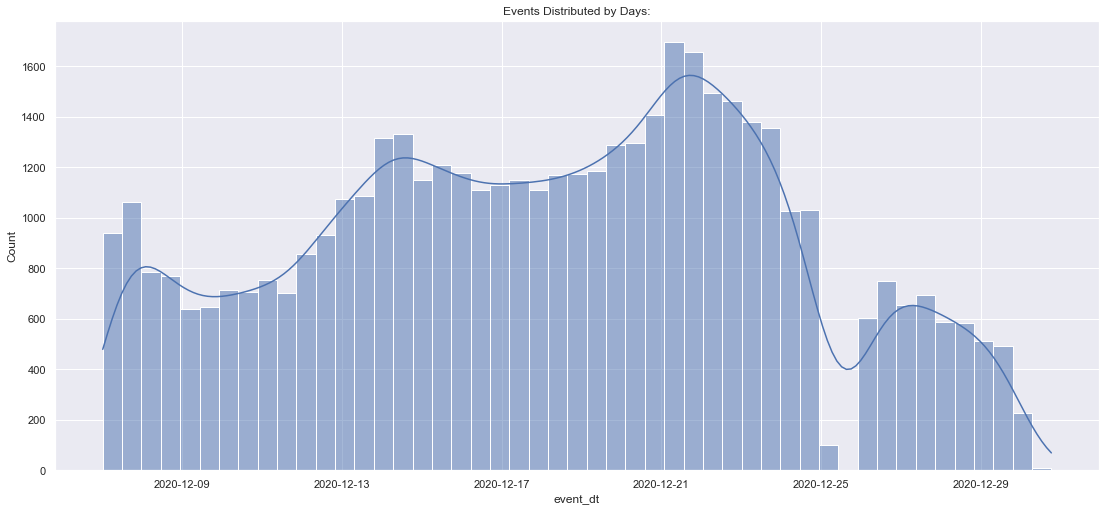

In [212]:
#fig = px.histogram(ab_events_relevant_df, x="event_dt")
#fig.show()
print()
sns.histplot(data=ab_events_relevant_df, x="event_dt", kde=True).set_title('Events Distributed by Days:')# ,hue = 'event_name')
sns.set(rc={'figure.figsize':(18.7,8.27)} )
plt.show()

Conclusion:

If we look of total events distributed by days it seems like there is an increase in the activity ( till the pick around the 23 of December.) then it starts decreasing.
Yet, it is a holiday season.. we expect more activity in generl. 

In [166]:
# What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. 

# Plotting the evens taken on the app during the all period:
#fig = px.histogram(ab_events_relevant_df, x="event_dt")
#fig.show()

#ab_events_relevant_df['event_dt'].hist( bins=20, figsize=(15,6),  alpha=0.7)
#ax = plt.gca()
#ax.legend()# ['group A','group B']
#fig = px


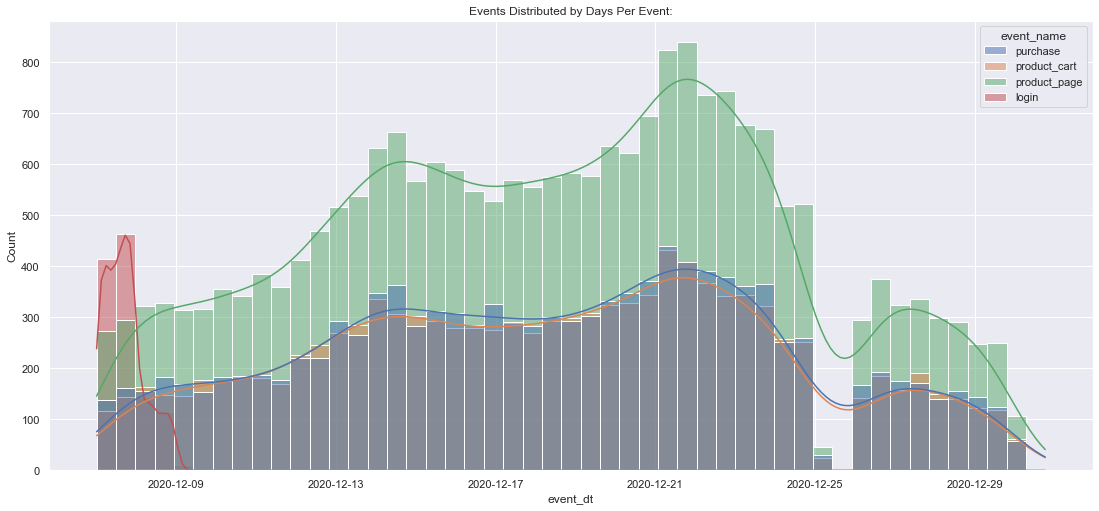

In [197]:
sns.histplot(data=ab_events_relevant_df, x="event_dt", kde=True ,hue = 'event_name').set_title('Events Distributed by Days Per Event:')
sns.set(rc={'figure.figsize':(18.7,8.27)})
plt.show()

Conclusion:

If we look seperately on of the events distributed by days apart from 'login', it seems like there is an increase in the activity ( till the pick around the 23 of December.) as well. then it starts decresing. 

Look how 'product_cart' and the 'purchase' resamble each other very much and how product page is the highest during the all period.  

Yet, it is a holiday season.. we expect more activity in generl. 

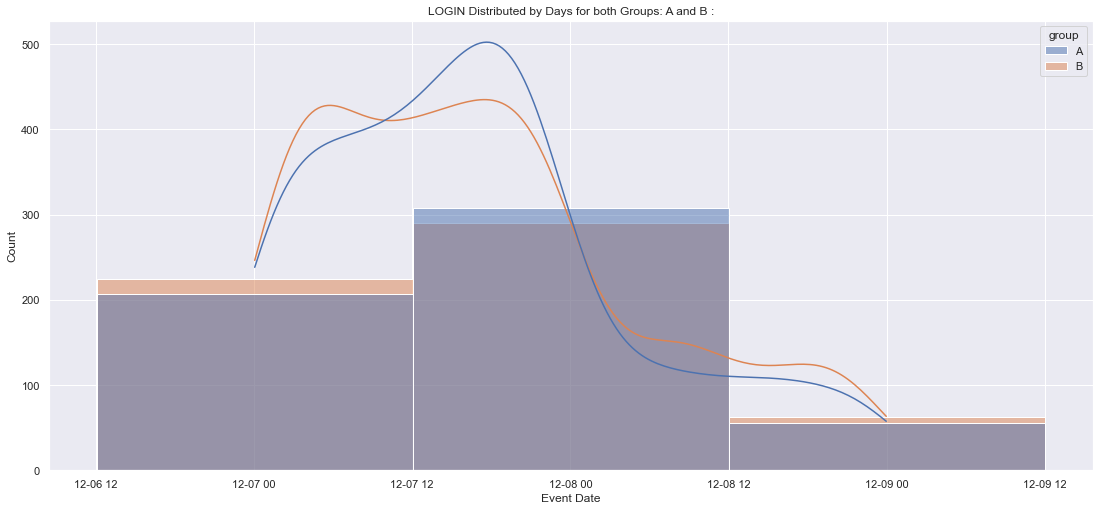

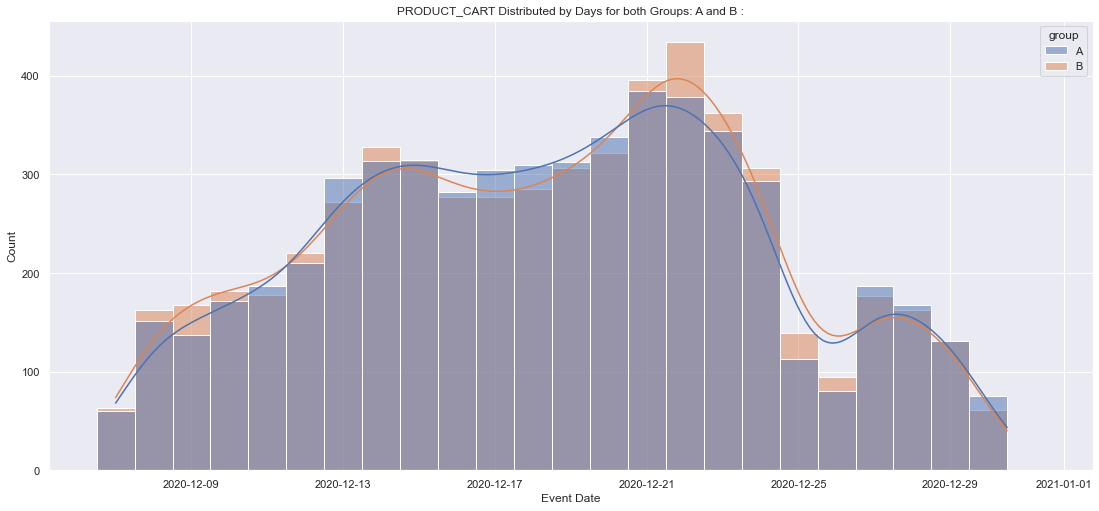

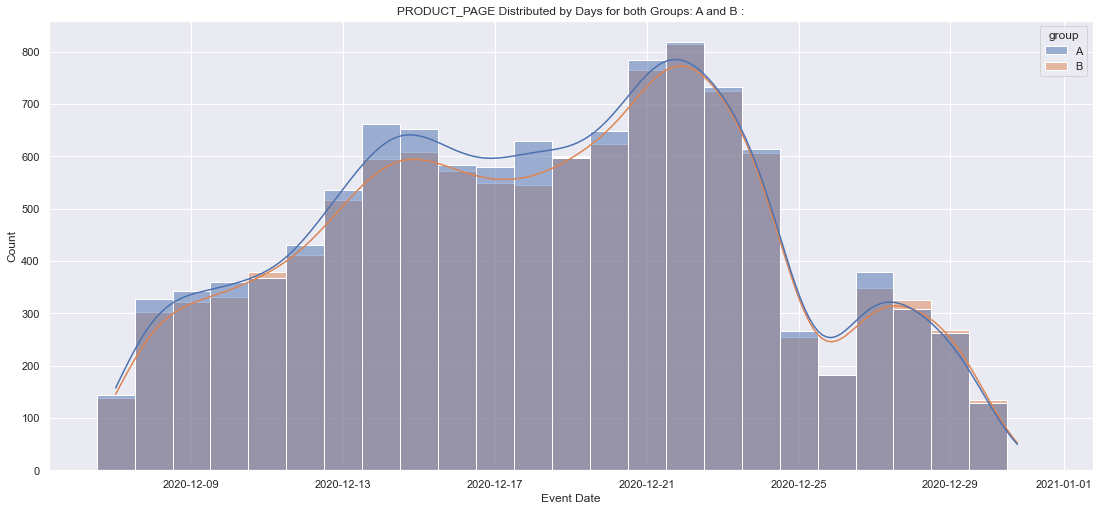

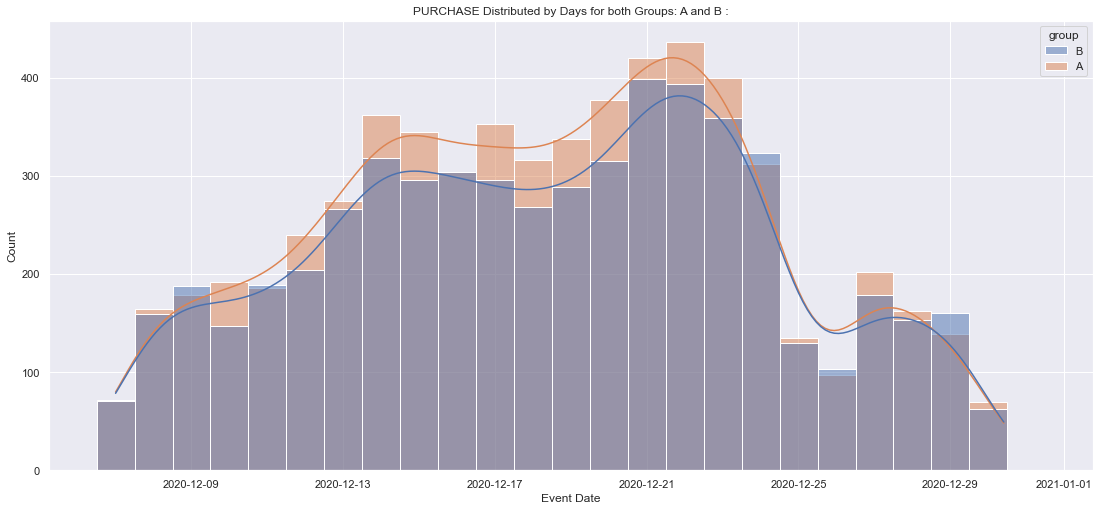

In [217]:
#Take a look at the general distribution of events by broup. 
#What can we say about the most popular event? 

dates_group_by_events= ab_events_relevant_df.groupby('event_name')

for group_name, group_data in dates_group_by_events:

    plt.figure()
    plt.xlabel('Event Date')
    plt.title(group_name)
    sns.histplot(data=group_data, x="event_dt", hue="group",  discrete = True,legend = True ,kde = True ).set_title(f'{group_name.upper()} Distributed by Days for both Groups: A and B :')#alpha = 0.5,



Conclusion:



In [218]:
# Let's figure out how many events and users are there now:


#curr_amount_users = filltered_df['user_id'].nunique()
#former_amount_users = df['user_id'].nunique()
#print(f"There are {curr_amount_users} users after excluding older data")
#e_lose = round(((former_amount_users- curr_amount_users) / former_amount_users)*100, 2)
#print(f"The lost is: {e_lose}% of users which are {(former_amount_users- curr_amount_users)} irrelevant users")
print()

#display(f"There still are, of course, same number of {filltered_df['event_name'].nunique()} unique events/stages")
print()
#print(f"The number of events per user after excluding older data:")
# for each user , how many unique action, stages
#display(filltered_df.groupby(['user_id'])['event_name'].nunique().reset_index())

print()
#print(f"The number of users who completed each and every number of stages out of 5,  after excluding older data:")
# distribution how many user complete all 5 stages..
# how many users complete 1\2\3\4\5 stages:
#display(filltered_df.groupby(['user_id'])['event_name'].nunique().reset_index()['event_name'].value_counts())

# users who coplete 4-5 are less then half (of 7551), 2707 only 1 




# Make sure you have users from all three experimental groups.
# Let's examine what groups they belong to:
ab_events_relevant_df_by_groups = ab_events_relevant_df.groupby(['group'])['user_id'].nunique().reset_index()

display(ab_events_relevant_df_by_groups)

,group,user_id
0,A,4730
1,B,4602


Conclusion:

There are users from both groups. 


    - Study conversion at different funnel stages
    

In [177]:
# See what events are in the logs and their frequency of occurrence. Sort them by frequency.¶
events_freq_sorted = ab_events_relevant_df.groupby(['event_name'])['user_id'].count().sort_values(ascending=False)
print(f'Events and their Frequency of Occurrence:')
display(events_freq_sorted)


#display(filltered_df.groupby(['event_name'])['user_id'].count().sum())

# Find the number of users who performed each of these actions. 
# Sort the events by the number of users. 
# Calculate the proportion of users who performed the event at least once.


display(ab_events_relevant_df.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False)/ab_events_relevant_df.user_id.nunique())

Events and their Frequency of Occurrence:


event_name
product_page    22259
purchase        11644
product_cart    11158
login            1147
Name: user_id, dtype: int64

event_name
product_page    0.767895
purchase        0.397878
product_cart    0.382340
login           0.098157
Name: user_id, dtype: float64

Conclusion:

There are total of 46208 events in the filltered data (4 unique ones), so that :
product_page's share is 48.2%  (22259 events), purchase share is 25.2% (11644 events), product_cart's share is 24.1% (11158 events), PaymentScreenSuccessful is 13.9% (25621 events)
and login's share is only 2.5% (1147 events)!




Note that the majority of 76.7% performed the product_page , less than 40% (49.5%) performed purchase or product_cart!
( and less than 1%  performed the login. )      

In [225]:
# In what order do you think the actions took place. 
# Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
# Sequence of events : 
# check how each user follow his path in the app:  creates a road map per user. figure the typical seq for a user in the app:

sorted_data=ab_events_relevant_df[ab_events_relevant_df['event_name']!='login'].sort_values(by=['user_id','event_dt'])

display(sorted_data.head(10))

# the overall order of seq of events
def sequence(user):
    sorted_user=sorted_data[sorted_data['user_id']==user].sort_values(by=['user_id','event_dt'])
    return sorted_user['event_name'].drop_duplicates().to_list()# to get uique values drop..then add to list 'eventname'


# for example : one perticular user: one jurney 109 rows..from (first date) to.. he copleted purchase only at the second..without offer!
#sequence(8619840625096464102)


# Iterating throgh all users and applying the func.. then we get a path for every user exist:
sequence_empty=[]
for i in sorted_data.user_id.unique():
    sequence_empty.append([i,sequence(i)])
    
path_data=pd.DataFrame(sequence_empty,columns=['user','path'])
display(path_data)
# Are all of them part of a single sequence? - can be , not have to be

# value_count on a list?? calculate the common path for a user on the app:
path_data['path'].value_counts()




,user_id,event_dt,event_name,details,event_date,in_range_dt,group,in_range_event_dt,sign_up_date
61572,0002CE61FF2C4011,2020-12-07 04:37:37,product_cart,NaN,2020-12-07,True,A,True,2020-12-07
122961,0002CE61FF2C4011,2020-12-07 04:37:42,product_page,NaN,2020-12-07,True,A,True,2020-12-07
124946,0002CE61FF2C4011,2020-12-08 22:14:19,product_page,NaN,2020-12-08,True,A,True,2020-12-07
62500,0002CE61FF2C4011,2020-12-08 22:14:20,product_cart,NaN,2020-12-08,True,A,True,2020-12-07
131424,0002CE61FF2C4011,2020-12-10 15:21:06,product_page,NaN,2020-12-10,True,A,True,2020-12-07
65675,0002CE61FF2C4011,2020-12-10 15:21:07,product_cart,NaN,2020-12-10,True,A,True,2020-12-07
78693,0002CE61FF2C4011,2020-12-15 12:47:05,product_cart,NaN,2020-12-15,True,A,True,2020-12-07
157496,0002CE61FF2C4011,2020-12-15 12:47:05,product_page,NaN,2020-12-15,True,A,True,2020-12-07
195681,001064FEAAB631A1,2020-12-20 14:43:28,product_page,NaN,2020-12-20,True,B,True,2020-12-20
205671,001064FEAAB631A1,2020-12-21 03:19:17,product_page,NaN,2020-12-21,True,B,True,2020-12-20


,user,path
0,0002CE61FF2C4011,"[product_cart, product_page]"
1,001064FEAAB631A1,[product_page]
2,001E72F50D1C48FA,[product_page]
3,002412F1EB3F6E38,[product_page]
4,002540BE89C930FB,"[product_cart, product_page]"
...,...,...
9164,FFE40BDB7364E966,[purchase]
9165,FFE5B14BD55C1C5C,[product_cart]
9166,FFE600EEC4BA7685,"[product_cart, product_page]"
9167,FFE7FC140521F5F6,"[purchase, product_cart, product_page]"


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[product_page]                            3075
[purchase, product_page]                  1729
[product_cart, product_page]              1114
[product_cart]                             831
[purchase]                                 782
[purchase, product_cart, product_page]     588
[product_page, product_cart]               436
[purchase, product_cart]                   385
[purchase, product_page, product_cart]     206
[product_page, purchase]                    15
[product_cart, purchase]                     5
[product_cart, product_page, purchase]       2
[product_page, product_cart, purchase]       1
Name: path, dtype: int64

Conclusion:

The most common path is only product_page followed by :purchase-->product_page and product_cart--->product_page

It is clear that not all of them part of a single sequence at all!

In [227]:
# At what stage do you lose the most users?

# Excluding Tutorial:
df_no_login = ab_events_relevant_df[ab_events_relevant_df['event_name']!='login']

# Creating a table with 3 stages and how many users complete each..
funnel_shift = df_no_login.groupby(['event_name'])['user_id'].nunique().sort_values(ascending=False).reset_index()
funnel_shift.columns = ['event_name','unique_users']


# Calculating the % change:(by func "pct_change") from stage to stage:
funnel_shift['perc_ch']=funnel_shift['unique_users'].pct_change()
display(funnel_shift)

#fig = px.funnel(funnel_shift, x='unique_users', y='event_name')
#fig.show()


fig =go.Figure(go.Funnel(
    y = funnel_shift.event_name,#["Visitors","Added a product to cart", "Started checkout", "Paid"],
    x = funnel_shift.unique_users#[583, 258,  120, 56]
    ))
fig.show() 

,event_name,unique_users,perc_ch
0,product_page,7166,NaN
1,purchase,3713,-0.481859
2,product_cart,3568,-0.039052


Conclusion:

The table above show the "drop" in terms of the number of users, from stage to stage. 
A trend of continuous decline is noticeable throughout all stages path. 
But the most significant and conspicuous decline of all stages is the one from product page to purchase. Yet, the drop from product page to product cart is not much less significant (49.8%)
This major drop has a share of 51.8% !


In [228]:
# What share of users make the entire journey from their first event to payment?

# distribution how many user complete all 5 stages..
# how many users complete 1\2\3\4\5 stages:
users_by_stages = df_no_login.groupby(['user_id'])['event_name'].nunique().reset_index()['event_name'].value_counts().to_frame()
users_by_stages.columns = ['users']
users_by_stages['share'] = users_by_stages['users'] / df_no_login.user_id.nunique()

display(users_by_stages)

# Users who made the entire journey:
users_made_all_stages = users_by_stages.loc[3] #+ users_by_stages.loc[4]
display(users_made_all_stages)


# Conclusion: share of users who make the entire journey from their first event to payment is 46%.

,users,share
1,4688,0.511288
2,3684,0.401789
3,797,0.086923


users    797.000000
share      0.086923
Name: 3, dtype: float64

Conclusion: share of users who make the entire journey from their first event to payment is around 9% , but since the sequence is ununified it doesn't say much..
Yet, even users who preformed 2 events are 40%

In [229]:
# Use the event funnel to find the share of users that proceed from each stage to the next. 
funnel_by_groups=[]
for i in df_no_login.group.unique():
    group=df_no_login[df_no_login.group==i].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
    display(group)
    funnel_by_groups.append(group)



# Adjust data to use plotly funnel split by group
funnel_by_groups=pd.concat(funnel_by_groups)
display(funnel_by_groups)


# Build visulization to see how the funnel and data varies in the 3 groups (the stages varies across 3 groups)
fig=px.funnel(funnel_by_groups,x='user_id',y='event_name',color='group')
fig.show()

,event_name,group,user_id
1,product_page,B,3527
0,product_cart,B,1812
2,purchase,B,1782


,event_name,group,user_id
1,product_page,A,3639
2,purchase,A,1931
0,product_cart,A,1756


,event_name,group,user_id
1,product_page,B,3527
0,product_cart,B,1812
2,purchase,B,1782
1,product_page,A,3639
2,purchase,A,1931
0,product_cart,A,1756


Conclusion: 

Let's examine the funnel splited by the diffrent groups: 


In [230]:
# Excluding purchase:
df_no_purchase_and_login = df_no_login[df_no_login['event_name']!='purchase']



# add the share of users (percentage change) who proceed from one stage to another in each group:
group_A = df_no_purchase_and_login[df_no_purchase_and_login.group=='A'].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(group_A)
group_B = df_no_purchase_and_login[df_no_purchase_and_login.group=='B'].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(group_B)
#group_248 = df_no_login[df_no_login.experiment_id==248].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
#display(group_248)

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Group A',
    y = group_A['event_name'], 
    x = group_A['user_id'], 
    textinfo = "value+percent previous"))

#fig.add_trace(go.Funnel(
#    name = 'Group B',
#    orientation = "h",
#    y = group_B['event_name'], 
#    x = group_B['user_id'], 
#   textposition = "inside",
#   textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Group B',
    orientation = "h",
    y = group_B['event_name'], 
    x = group_B['user_id'],
   textposition = 'inside',#"outside",
   textinfo = "value+percent previous"))

fig.show()

,event_name,group,user_id
1,product_page,A,3639
0,product_cart,A,1756


,event_name,group,user_id
1,product_page,B,3527
0,product_cart,B,1812


In [231]:
# Excluding product cart:

df_no_cart_and_login = df_no_login[df_no_login['event_name']!='product_cart']



# add the share of users (percentage change) who proceed from one stage to another in each group:
group_A = df_no_cart_and_login[df_no_cart_and_login.group=='A'].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(group_A)
group_B = df_no_cart_and_login[df_no_cart_and_login.group=='B'].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(group_B)
#group_248 = df_no_login[df_no_login.experiment_id==248].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
#display(group_248)

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Group A',
    y = group_A['event_name'], 
    x = group_A['user_id'], 
    textinfo = "value+percent previous"))

#fig.add_trace(go.Funnel(
#    name = 'Group B',
#    orientation = "h",
#    y = group_B['event_name'], 
#    x = group_B['user_id'], 
#   textposition = "inside",
#   textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Group B',
    orientation = "h",
    y = group_B['event_name'], 
    x = group_B['user_id'],
   textposition = 'inside',#"outside",
   textinfo = "value+percent previous"))

fig.show()

,event_name,group,user_id
0,product_page,A,3639
1,purchase,A,1931


,event_name,group,user_id
0,product_page,B,3527
1,purchase,B,1782


Conclusion:

GROUP 246:
out of 2003 users who visit MainScreen, 64% proceed to the OfferScreen (1276 users),
out of 1276,  81% (1030 users) proceed to CartScreen, 
out of 2030, 95%(977 users) proceed to PaymentScreen (and out of them 28% (274) proceed to Tutorial)

GROUP 247:
out of 2009 users who visit MainScreen, 62% proceed to the OfferScreen (1236 users),
out of 1276,  81% (1001 users) proceed to CartScreen, 
out of 2030, 93%(933 users) proceed to PaymentScreen (and out of them 30% (281) proceed to Tutorial)

GROUP 248:
out of 2005 users who visit MainScreen, 61% proceed to the OfferScreen (1231 users), 
out of 1276,  80% (983 users) proceed to CartScreen, 
out of 2030, 96%(942 users) proceed to PaymentScreen (and out of them 29% (274) proceed to Tutorial)


To conclude 246 preforms the best! - it has the biggerst number of users who converted and the least who quit after the MainScreen.
Yet there is no significant difference between the groups.

- Think of the possible details in the data that you have to take into account before starting the A/B test?

A/A test

- Is the number of events per user distributed equally in the samples?

,,events_per_user
user_id,group,
0002CE61FF2C4011,A,9
001064FEAAB631A1,B,3
001E72F50D1C48FA,B,3
002412F1EB3F6E38,A,3
002540BE89C930FB,A,6
...,...,...
FFE40BDB7364E966,B,3
FFE5B14BD55C1C5C,B,1
FFE600EEC4BA7685,A,4


Text(0.5, 1.0, 'Events Distributed by User:')

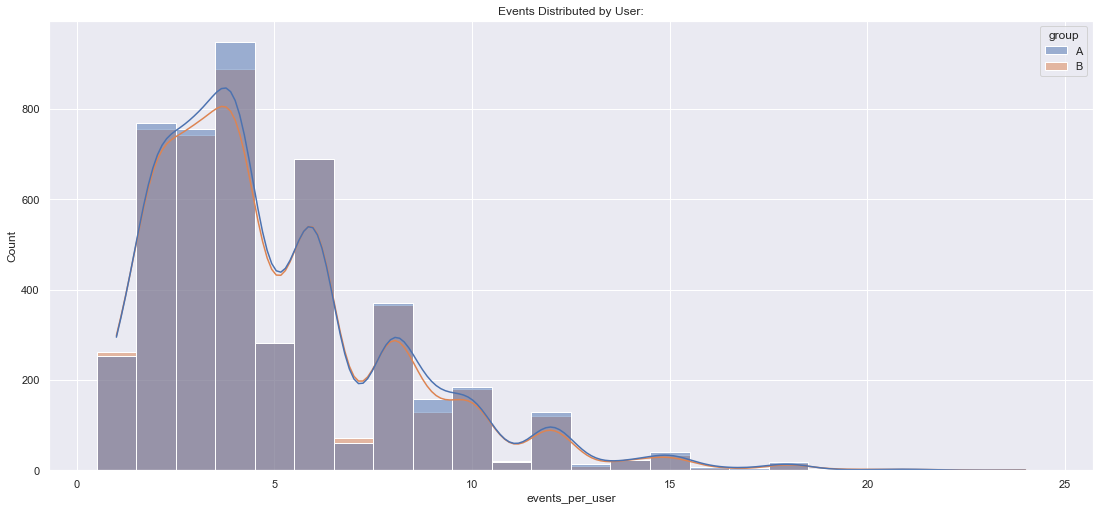

In [268]:
#display(ab_events_relevant_df)
ab_events_per_user_df = ab_events_relevant_df.groupby(['user_id','group'])['event_name'].count().to_frame()
ab_events_per_user_df.columns = ['events_per_user']
display(ab_events_per_user_df)
sns.histplot(data=ab_events_per_user_df, x="events_per_user", discrete=True, hue = 'group', kde=True).set_title('Events Distributed by User:')
#sns.set(rc={'figure.figsize':(18.7,8.27)})
#plt.show()

 Conclution: the number of events per user is distributed equally in the samples.

## Study the results of the experiment

Step 5. Study the results of the experiment

   * How many users are there in each group?
   * We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247:
    * Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly? (A/A) 246 vs 247
   * Do the same thing for the group with altered fonts. (A/B)Compare the results with those of each of the control groups for each event in isolation. (247 vs 248 and 246 vs 248)

        Compare the results with the combined results for the control groups.(247+246 vs 248)
What conclusions can you draw from the experiment?
   * What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.
   
   
   
   
requirements for proprotion test:

   * The sampling method is simple random sampling.
   * Each sample point can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure.
   * The sample includes at least 10 successes and 10 failures.
   * The population size is at least 20 times as big as the sample size.

In [232]:
display(ab_events_relevant_df.groupby(['group'])['user_id'].nunique())
#the samples are more or less == sizes 


# make sure that none of users are in both groups
display(ab_events_relevant_df.groupby(['user_id'])['group'].nunique().reset_index().query('group>1'))
# we dont have such.. we are good to go (if we had. earase them from both cause we dont know what they saw- what versio)

group
A    4730
B    4602
Name: user_id, dtype: int64

,user_id,group


Conclusion:

Appearently there are 4730 users in A control group, 4602 users in B, the test group.

Moreover, it turns out that none of the users participates in more than a single group at the same time!

Formulating Hypothesis:

Null Hypothesis(H0)- for A/B test: 
The mean populations' proportions of a specific event of the two groups (one control group - A and the other is test group- B) is equal.
That is to say, for instance: "The share of users (from all users in the test) that had "purchase" in the control group is statistically equals to the share of users that had "purchase" in the test group"

This null hypothesis(H0) is being checked for each of the events. 
         
Thus, using the same null hypothesis that two populations' proportions are equal, we can test the alternative hypotheses that 1) the proportions simply aren't equal, or that 2) one proportion is larger or smaller than the other..

In case the p value is smaller than the significance level (alpha) chosen, the null hypothesis is rejected, and it can be concluded that there is indeed a significant difference between the proportions share of the specific event between the control group and the test group.

Otherwise, the null hypothesis is failed to be rejected and it can concluded that the proportions are the same, since there is no reason to consider the proportions are different.


In [271]:
# So you need to check whether two test groups are significantly different in each event.
pivot=ab_events_relevant_df.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique').reset_index()
display(pivot)

# function to check any group, stage..-from theory. (or scipy verssion for ztest of proportion in stead)
 # trials- users who belong to specific group. 
# success - the users from this group who perform the event
def check_hypothesis(group1,group2,event,alpha=0.05):
    success1=pivot[pivot.event_name==event][group1].iloc[0]
    success2=pivot[pivot.event_name==event][group2].iloc[0]
    
    trials1=ab_events_relevant_df[ab_events_relevant_df.group==group1]['user_id'].nunique()
    trials2=ab_events_relevant_df[ab_events_relevant_df.group==group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = success1/trials1

    # success proportion in the second group:
    p2 = success2/trials2

    # success proportion in the combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', round(p_value,3))

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1, group2 )
    
    

for i in pivot.event_name.unique():
    check_hypothesis('A','B',i,alpha=0.05)



group,event_name,A,B
0,login,465,451
1,product_cart,1756,1812
2,product_page,3639,3527
3,purchase,1931,1782


p-value:  0.96
Failed to reject the null hypothesis for login and groups A B
p-value:  0.025
Rejecting the null hypothesis for product_cart and groups A B
p-value:  0.737
Failed to reject the null hypothesis for product_page and groups A B
p-value:  0.038
Rejecting the null hypothesis for purchase and groups A B


Conclution:
For a significance level of 0.05.
Surprisangly, A is better than B, the change has a negative effect on purchase, with some advantage on cart.


In [274]:
# now - details is a number if purchase and 0  if other event

purchase_events_df = ab_events_relevant_df[ab_events_relevant_df['event_name']== 'purchase']
purchase_details_df=purchase_events_df[['event_name','details']]
display(purchase_details_df)# 9826 rows
purchase_details_df.details.value_counts()

display(purchase_details_df.stb.missing(style = True)) # there are no missing values - meaning that there is always details when a purchase made!


,event_name,details
3,purchase,4.99
9,purchase,4.99
11,purchase,4.99
12,purchase,9.99
13,purchase,9.99
...,...,...
60286,purchase,9.99
60291,purchase,4.99
60300,purchase,99.99
60304,purchase,9.99


,missing,total,percent
event_name,0,"11,644",0.00%
details,0,"11,644",0.00%


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11644 entries, 3 to 60313
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   event_name  11644 non-null  object 
 1   details     11644 non-null  float64
dtypes: float64(1), object(1)
memory usage: 272.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46208 entries, 3 to 247561
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            46208 non-null  object        
 1   event_dt           46208 non-null  datetime64[ns]
 2   event_name         46208 non-null  object        
 3   details            11644 non-null  float64       
 4   event_date         46208 non-null  datetime64[ns]
 5   in_range_dt        46208 non-null  bool          
 6   group              46208 non-null  object        
 7   in_range_event_dt  46208 non-null  bool          
 8   sign_up_da

In [288]:

#To plot the graphs, we have to collect cumulative data.
# Let's declare a DataFrame with the following columns:date, group, and :
# orders — the number of orders on the date specified for the group specified
# purchase — the number of users who make at least one purchase on the date specified for the group specified
# users — the number of visitors to the online store on the date specified for the group specified
# building an array with unique paired date-group values 
datesGroups = ab_events_relevant_df[['event_date','group']].drop_duplicates() 


eventsAggregated = datesGroups.apply(
    lambda x: ab_events_relevant_df[
        np.logical_and(
            ab_events_relevant_df['event_date'] <= x['event_date'], ab_events_relevant_df['group'] == x['group']
        )
    ].agg(
        {
            'event_date': 'max',
            'group': 'max',
            'details': 'count', # count the amount of purchases on date
            'user_id': pd.Series.nunique # unique users on date
            #'event_name': 'count', #nunique  # count the total events on date
        }
    ),
    axis=1,
).sort_values(by=['event_date', 'group'])


eventsAggregated.columns = ['event_date', 'group', 'purchases', 'users']#, 'events']

display(eventsAggregated)

,event_date,group,purchases,users
9,2020-12-07,A,155,463
3,2020-12-07,B,154,457
1655,2020-12-08,A,324,704
1651,2020-12-08,B,325,701
3385,2020-12-09,A,497,887
3381,2020-12-09,B,489,877
5077,2020-12-10,A,693,1097
5073,2020-12-10,B,671,1079
7084,2020-12-11,A,893,1274
7085,2020-12-11,B,847,1263


 - Calculate each group's conversion rate as the ratio of purchases to the number of events for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

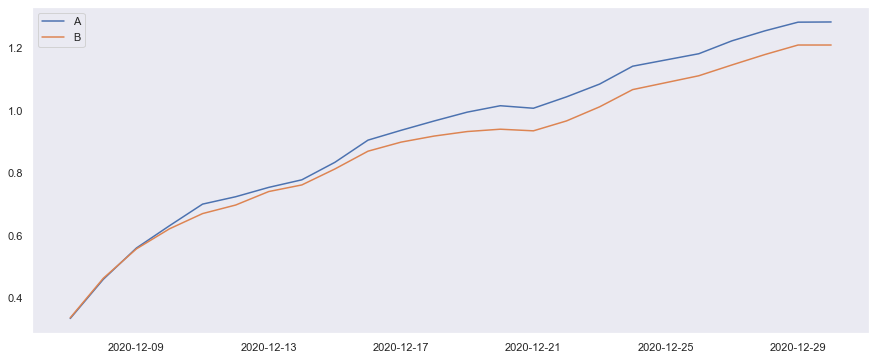

In [282]:
# calculating cumulative conversion
eventsAggregated['conversion'] = eventsAggregated['purchases']/eventsAggregated['users']

# selecting data on group A 
cumulativeDataA = eventsAggregated[eventsAggregated['group']=='A']

# selecting data on group B
cumulativeDataB = eventsAggregated[eventsAggregated['group']=='B']

# plotting the graphs
plt.rcParams["figure.figsize"] = (15,6)

plt.plot(cumulativeDataA['event_date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['event_date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.show()



Both groups were fluctuating but then the conversion rate of group B starts fluctuating less dramatically, yet not completely stabilizing, while the conversion rate of group A dropped but then stabilized a bit more, but not completely .

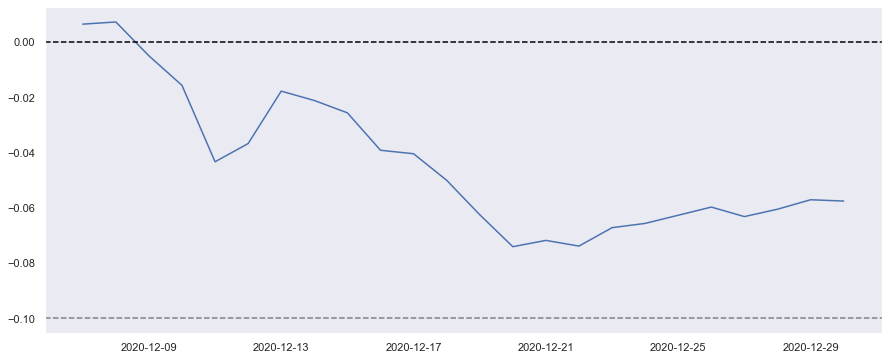

In [287]:

#Let's plot a relative difference graph for the cumulative conversion rates:
mergedCumulativeConversions = cumulativeDataA[['event_date','conversion']].merge(cumulativeDataB[['event_date','conversion']], left_on='event_date', right_on='event_date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['event_date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.grid()
plt.show()

- Find the statistical significance of the difference in conversion between the groups . Make conclusions and conjectures.

The null hypothesis H0 is: There is no difference in conversion between the groups.

The alternative hypothesis H1 is: There is a difference in conversion between the groups.

Let's test it statistically:

In [292]:

#Let's calculate the statistical significance of the difference in conversion between the groups.
#create the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders']. 
#For users with at least one order, we'll indicate the number of orders made.
eventsByUsersA = ab_events_relevant_df[ab_events_relevant_df['group']=='A'].groupby('user_id', as_index=False).agg({'event_name' : pd.Series.nunique})
eventsByUsersA.columns = ['user_id', 'events']

eventsByUsersB = ab_events_relevant_df[ab_events_relevant_df['group']=='B'].groupby('user_id', as_index=False).agg({'event_name' : pd.Series.nunique})
eventsByUsersB.columns = ['user_id', 'events'] 

display(eventsByUsersA)

,user_id,events
0,0002CE61FF2C4011,3
1,002412F1EB3F6E38,1
2,002540BE89C930FB,2
3,004C58ADE7CA8C4A,2
4,0053DD654C9513D6,2
...,...,...
4725,FFC2CFB58A63BE68,1
4726,FFC676CB3E0A60B8,2
4727,FFDA3BD9A090A179,2
4728,FFE600EEC4BA7685,2


In [295]:

#Let's calculate the statistical significance of the difference in conversion between the groups.
#create the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders']. 
#For users with at least one order, we'll indicate the number of orders made.
eventsByUsersA = ab_events_relevant_df[ab_events_relevant_df['group']=='A'].groupby('user_id', as_index=False).agg({'event_name' : pd.Series.nunique})
eventsByUsersA.columns = ['user_id', 'events']

evensByUsersB = ab_events_relevant_df[ab_events_relevant_df['group']=='B'].groupby('user_id', as_index=False).agg({'event_name' : pd.Series.nunique})
eventsByUsersB.columns = ['user_id', 'events'] 

#Now we'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders. 
#Those who didn't order anything will have 0. This is necessary to prepare the samples for the Mann-Whitney test.
# sampleA cotains:
# 1. A list of the number of orders for each user: ordersByUsersA['orders'].
# 2. Zeroes for users who didn't order anything. 
# Their number is the difference between the total number of visitors and the number of records on orders: visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])


sampleA = pd.concat([eventsByUsersA['events'],pd.Series(0, index=np.arange(ab_events_relevant_df[ab_events_relevant_df['group']=='A']['event_name'].count() - len(eventsByUsersA['events'])), name='events')],axis=0)

sampleB = pd.concat([eventsByUsersB['events'],pd.Series(0, index=np.arange(ab_events_relevant_df[ab_events_relevant_df['group']=='B']['event_name'].count() - len(eventsByUsersB['events'])), name='events')],axis=0)

#[Remember that sampleA stores a sample where each element is the number of orders made by a certain user, including zeroes. 
#So the number of sampleA elements is the number of users, and the sum of all the elements is the number of orders. ]

testing_average(sampleA, sampleB)

# We'll find the conversion rate for group B in a similar way
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.649
Fail to Reject H0
0.008


--> 0.006
-->Reject H0
-->0.160

Conclusion:

Based on the raw data, there is a difference between groups A and B.

The first row of the output gives us the p-value, 0.006, which is smaller than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. The relative gain of group B is 16% (the second row of the output).

In [ ]:
# Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

# The null hypothesis H0 is: There is no difference in conversion between the filtered groups.

# The alternative hypothesis H1 is: There is a difference in conversion between the filtered groups.

#Let's test it statistically:

#Let's define anomalous users as those who place more than two orders or one order bigger than $830.
# Thus we'll remove the 1% of users with the largest numbers of orders and from  the users with the most expensive orders.

# Let's make data slices with the users who placed more than two orders (usersWithManyOrders) 
# and the users who placed orders for more than $830 (usersWithExpensiveOrders). 
#We'll join them in a table called abnormalUsers.

#Let's find the total number of anomalous users using the shape() method.
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['user_id'], ordersByUsersB[ordersByUsersB['orders'] > 4]['user_id']], axis = 0)
usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 414.275]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

display(abnormalUsers.head(5))
display(abnormalUsers.shape) 

# --We have 68 anomalous users in total.
#Let's try to find out how their actions affected the test results. 
# We'll calculate the statistical significance of the differences in conversion between the groups, using filtered data. 
# First we'll prepare samples of the number of orders per user for each test group:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

#Let's apply the statistical Mann-Whitney criterion to the resulting samples:
testing_average(sampleAFiltered,sampleBFiltered)
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
#568     113298937
#1099    148427295
#928     204675465
#684     358944393
#36      366673373

#dtype: int64
#(68,)
#0.001
#Reject H0
#0.265

#Conclusion: The p-value is considerably less than 0.05, sowe can safely reject the null hypothesis and conclude that the average order size differs between the groups. Nonetheless, the average order size for group B is much greater than it is for group A.

 Make a decision based on the test results. The possible decisions are:Stop the test, consider one of the groups the leader /Stop the test, conclude that there is no difference between the groups./ Continue the test.
Here are the facts:

* Both raw and filtered data demonstrate statistically significant differences in conversion between the groups.
* Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
The graphs showing the difference in conversion and average order size between the groups tells us that group B's results are are improving significantly.

Based on these facts, we can conclude that the test is succesful and should be stopped with the understanding that segment B is better than segment A with high probability.

In [291]:
# Exclude Tutorial from funnel:

# Add the share of users (percentage change) who proceed from one stage to another in each group:
group_A = df_no_login[df_no_login.group=='A'].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(group_A)
group_B = df_no_login[df_no_login.group=='B'].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
display(group_B)
#group_248 = df_no_login[df_no_login.experiment_id==248].groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id',ascending=False)
#display(group_248)

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Group A',
    y = group_A['event_name'], 
    x = group_A['user_id'], 
    textinfo = "value+percent previous"))

#fig.add_trace(go.Funnel(
#    name = 'Group B',
#    orientation = "h",
#    y = group_B['event_name'], 
#    x = group_B['user_id'], 
#   textposition = "inside",
#   textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'Group B',
    orientation = "h",
    y = group_B['event_name'], 
    x = group_B['user_id'],
   textposition = 'inside',#"outside",
   textinfo = "value+percent previous"))

fig.show()

,event_name,group,user_id
1,product_page,A,3639
2,purchase,A,1931
0,product_cart,A,1756


,event_name,group,user_id
1,product_page,B,3527
0,product_cart,B,1812
2,purchase,B,1782
